In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from analysis_utils import get_df

In [2]:
identifier = '*'
df = get_df(identifier)
print('before filtering, there are a total of', len(df), 'models')

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


before filtering, there are a total of 281 models


# (TODO) Filtering: Only Consider Internally Consistent (5 targets all better than DAS)

# Filter: Only Consider Externally Consistent (3 experiments all better than DAS)

In [3]:
df = df.query('target_anechoic_cyst_5mm_avg_cnr_dnn >= target_anechoic_cyst_5mm_avg_cnr_das & \
               target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn >= target_phantom_anechoic_cyst_2p5mm_avg_cnr_das & \
               target_in_vivo_avg_cnr_dnn >= target_in_vivo_avg_cnr_das')

# Filter by Less or Equal SNR

In [4]:
# tolerance = 1.0
df = df.query('target_anechoic_cyst_5mm_avg_snr_dnn <= target_anechoic_cyst_5mm_avg_snr_das + 1.0 & \
               target_phantom_anechoic_cyst_2p5mm_avg_snr_dnn <= target_phantom_anechoic_cyst_2p5mm_avg_snr_das + 1.0 & \
               target_in_vivo_avg_snr_dnn <= target_in_vivo_avg_snr_das + 1.0')

# CNR Distribution: Simulation, Phantom, and In Vivo

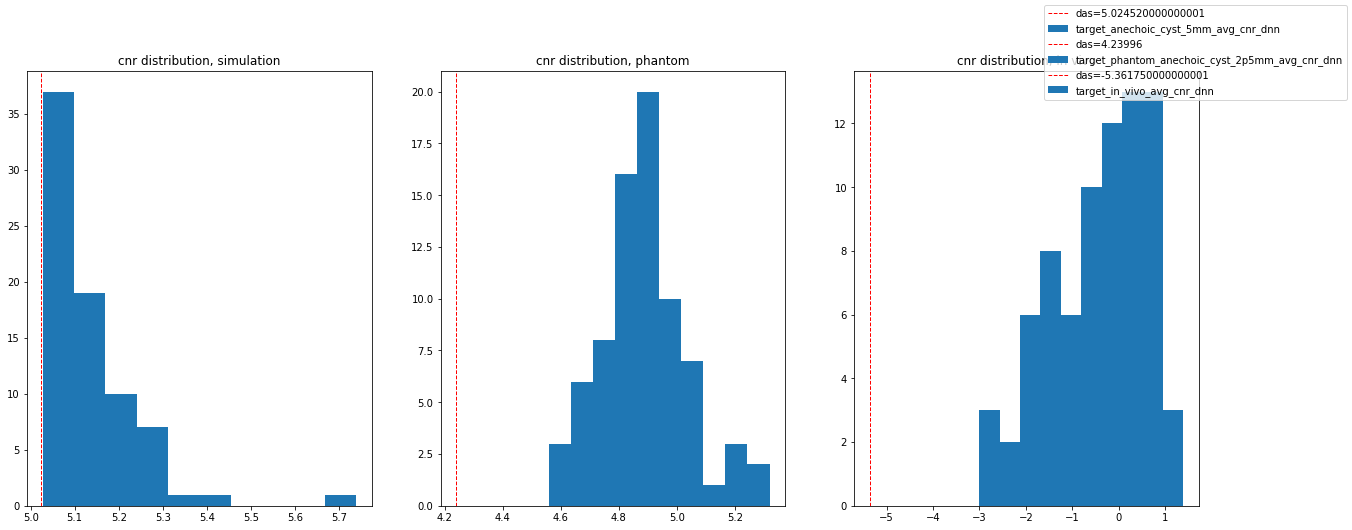

In [5]:
import random 
random_row = random.choice(df.index)

cnr_simulation_das = df.loc[random_row, 'target_anechoic_cyst_5mm_avg_cnr_das']
fig, axes = plt.subplots(1, 3, figsize=(21,8))
axes[0].hist(df['target_anechoic_cyst_5mm_avg_cnr_dnn'])
axes[0].axvline(cnr_simulation_das, color='red', linestyle='dashed', linewidth=1, label='das='+str(cnr_simulation_das))
axes[0].set_title('cnr distribution, simulation')

cnr_phantom_das = df.loc[random_row, 'target_phantom_anechoic_cyst_2p5mm_avg_cnr_das']
axes[1].hist(df['target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'])
axes[1].axvline(cnr_phantom_das, color='red', linestyle='dashed', linewidth=1, label='das='+str(cnr_phantom_das))
axes[1].set_title('cnr distribution, phantom')

cnr_in_vivo_das = df.loc[random_row, 'target_in_vivo_avg_cnr_das']
axes[2].hist(df['target_in_vivo_avg_cnr_dnn'])
axes[2].axvline(cnr_in_vivo_das, color='red', linestyle='dashed', linewidth=1, label='das='+str(cnr_in_vivo_das))
axes[2].set_title('cnr distribution, in vivo')

# TODO: DNNs
# axes[1, 0].hist(df['target_anechoic_cyst_5mm_avg_cnr_dnn'])
# axes[1, 0].axvline(cnr_simulation_das, color='red', linestyle='dashed', linewidth=1, label='das='+str(cnr_simulation_das))
# axes[1, 0].set_title('cnr distribution, simulation')

# cnr_phantom_das = df.loc[0, 'target_phantom_anechoic_cyst_2p5mm_avg_cnr_das']
# axes[1, 1].hist(df['target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'])
# axes[1, 1].axvline(cnr_phantom_das, color='red', linestyle='dashed', linewidth=1, label='das='+str(cnr_phantom_das))
# axes[1, 1].set_title('cnr distribution, phantom')

# cnr_in_vivo_das = df.loc[0, 'target_in_vivo_avg_cnr_das']
# axes[1, 2].hist(df['target_in_vivo_avg_cnr_dnn'])
# axes[1, 2].axvline(cnr_in_vivo_das, color='red', linestyle='dashed', linewidth=1, label='das='+str(cnr_in_vivo_das))
# axes[1, 2].set_title('cnr distribution, in vivo')


fig.legend()
plt.show()

# CNR Correlation: Simulation vs Phantom vs In Vivo

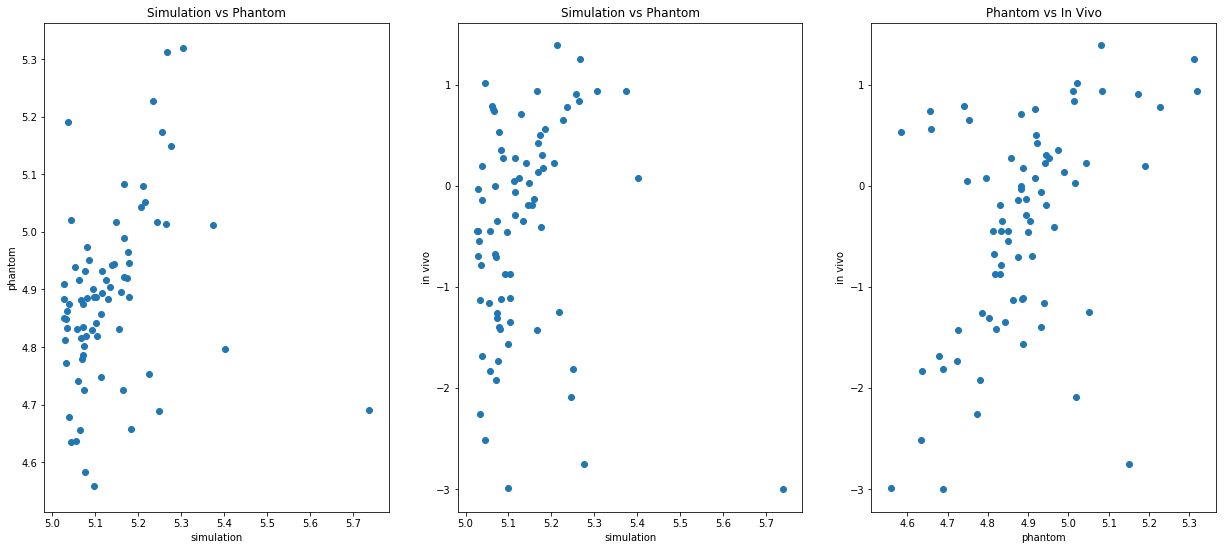

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(21, 9))

axes[0].scatter(df['target_anechoic_cyst_5mm_avg_cnr_dnn'], df['target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'])
axes[0].set_xlabel('simulation')
axes[0].set_ylabel('phantom')
axes[0].set_title('Simulation vs Phantom')

axes[1].scatter(df['target_anechoic_cyst_5mm_avg_cnr_dnn'], df['target_in_vivo_avg_cnr_dnn'])
axes[1].set_xlabel('simulation')
axes[1].set_ylabel('in vivo')
axes[1].set_title('Simulation vs Phantom')

axes[2].scatter(df['target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'], df['target_in_vivo_avg_cnr_dnn'])
axes[2].set_xlabel('phantom')
axes[2].set_ylabel('in vivo')
axes[2].set_title('Phantom vs In Vivo')

plt.show()

# CNR vs Loss

# Speckle SNR vs Loss

# CNR vs Hyperparams

# Find Max CNR Row

In [7]:
print(df.loc[df['target_anechoic_cyst_5mm_avg_cnr_dnn'].idxmax()]['name']) # simulation
print(df.loc[df['target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'].idxmax()]['name']) # phantom
print(df.loc[df['target_in_vivo_avg_cnr_dnn'].idxmax()]['name']) # in vivo


20180730110542_4_evaluated
20180801163205_39_evaluated
20180718164411_47_evaluated


# CNR vs SNR

In [8]:
def label_point(df, x, y, ax):
#     a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in df.iterrows():
        ax.text(point[x], point[y], str(i))

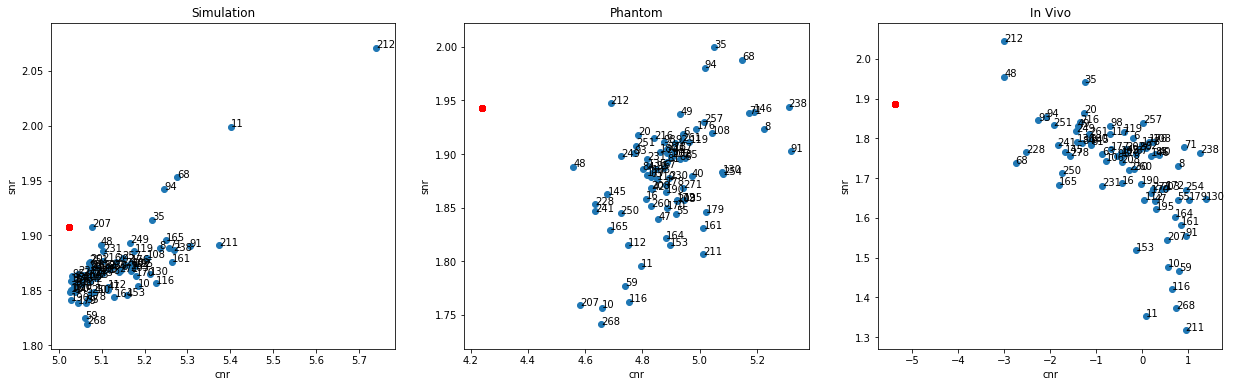

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# Simulation
axes[0].scatter(df['target_anechoic_cyst_5mm_avg_cnr_dnn'], df['target_anechoic_cyst_5mm_avg_snr_dnn'])
axes[0].scatter(df['target_anechoic_cyst_5mm_avg_cnr_das'], df['target_anechoic_cyst_5mm_avg_snr_das'], color='red')
axes[0].set_xlabel('cnr')
axes[0].set_ylabel('snr')
axes[0].set_title('Simulation')
label_point(df, 'target_anechoic_cyst_5mm_avg_cnr_dnn', 'target_anechoic_cyst_5mm_avg_snr_dnn', axes[0])

# Phantom
axes[1].scatter(df['target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'], df['target_phantom_anechoic_cyst_2p5mm_avg_snr_dnn'])
axes[1].scatter(df['target_phantom_anechoic_cyst_2p5mm_avg_cnr_das'], df['target_phantom_anechoic_cyst_2p5mm_avg_snr_das'], color='red')
axes[1].set_xlabel('cnr')
axes[1].set_ylabel('snr')
axes[1].set_title('Phantom')
label_point(df, 'target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn', 'target_phantom_anechoic_cyst_2p5mm_avg_snr_dnn', axes[1])

# In Vivo
axes[2].scatter(df['target_in_vivo_avg_cnr_dnn'], df['target_in_vivo_avg_snr_dnn'])
axes[2].scatter(df['target_in_vivo_avg_cnr_das'], df['target_in_vivo_avg_snr_das'], color='red')
axes[2].set_xlabel('cnr')
axes[2].set_ylabel('snr')
axes[2].set_title('In Vivo')
label_point(df, 'target_in_vivo_avg_cnr_dnn', 'target_in_vivo_avg_snr_dnn', axes[2])




plt.show()

# Top 10s of both Phantom and In Vivo

In [10]:
in_vivo_largest_10 = df.nlargest(10, 'target_in_vivo_avg_cnr_dnn')
phantom_largest_10 = df.nlargest(10, 'target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn')
both = df.loc[in_vivo_largest_10.index & phantom_largest_10.index]
both

input_size output_size batch_norm use_pooling pooling_method  \
130         65         130          0           1            max   
238         65         130          0           0            max   
91          65         130          1           0            max   
254         65         130          1           0            max   
71          65         130          0           0            max   
8           65         130          1           1            max   

    conv1_kernel_size conv1_num_kernels conv1_stride conv1_dropout  \
130                20                16            1             0   
238                20                28            1             0   
91                 17                50            1             0   
254                 8                29            1             0   
71                 20                44            1             0   
8                  12                39            1             0   

    pool1_kernel_size                      ...                        \
130                 2                      ...                         
238                 2                      ...                         
91                  3                      ...                         
254                 2                      ...                         
71                  2                      ...                         
8                   2                      ...                         

    target_phantom_anechoic_cyst_2p5mm_target_4_snr_das  \
130                                             2.0478    
238                                             2.0478    
91                                              2.0478    
254                                             2.0478    
71                                              2.0478    
8                                               2.0478    

    target_phantom_anechoic_cyst_2p5mm_target_4_snr_dnn  \
130                                             1.9558    
238                                             2.0273    
91                                              2.0248    
254                                             1.9756    
71                                              2.0298    
8                                               2.0423    

    target_phantom_anechoic_cyst_2p5mm_target_1_cnr_das  \
130                                             4.3994    
238                                             4.3994    
91                                              4.3994    
254                                             4.3994    
71                                              4.3994    
8                                               4.3994    

    target_phantom_anechoic_cyst_2p5mm_target_1_cnr_dnn  \
130                                             5.0347    
238                                             5.2391    
91                                              5.0545    
254                                             4.9873    
71                                              5.0867    
8                                               5.0464    

    target_phantom_anechoic_cyst_2p5mm_target_1_snr_das  \
130                                             1.9298    
238                                             1.9298    
91                                              1.9298    
254                                             1.9298    
71                                              1.9298    
8                                               1.9298    

    target_phantom_anechoic_cyst_2p5mm_target_1_snr_dnn  \
130                                             1.8552    
238                                             1.9028    
91                                              1.8345    
254                                             1.8352    
71                                              1.8994    
8                                               1.8603    

    target_phantom_anechoic_cyst_2p5mm_avg_cnr_

In [11]:
import matplotlib.image as mpimg
import os

model_name = '20180718164411_5_evaluated'
model_folder = os.path.join('..', 'DNNs', model_name)

def inspect_by_name(model_name):
    # Simulation
    fig, axes = plt.subplots(5,2, figsize=(16,40), frameon=False)
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_anechoic_cyst_5mm', 'target_1_SNR_10dB', 'das.png'))
    imgplot = axes[0, 0].imshow(img)
    axes[0, 0].set_title('Simulation: target 1 - DAS')
    axes[0, 0].set_axis_off()
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_anechoic_cyst_5mm', 'target_1_SNR_10dB', 'dnn.png'))
    imgplot = axes[0, 1].imshow(img)
    axes[0, 1].set_title('Simulation: target 1 - DNN')
    axes[0, 1].set_axis_off()
    
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_anechoic_cyst_5mm', 'target_2_SNR_10dB', 'das.png'))
    imgplot = axes[1, 0].imshow(img)
    axes[1, 0].set_title('Simulation: target 2 - DAS')
    axes[1, 0].set_axis_off()
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_anechoic_cyst_5mm', 'target_2_SNR_10dB', 'dnn.png'))
    imgplot = axes[1, 1].imshow(img)
    axes[1, 1].set_title('Simulation: target 2 - DNN')
    axes[1, 1].set_axis_off()
    
    
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_anechoic_cyst_5mm', 'target_3_SNR_10dB', 'das.png'))
    imgplot = axes[2, 0].imshow(img)
    axes[2, 0].set_title('Simulation: target 3 - DAS')
    axes[2, 0].set_axis_off()
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_anechoic_cyst_5mm', 'target_3_SNR_10dB', 'dnn.png'))
    imgplot = axes[2, 1].imshow(img)
    axes[2, 1].set_title('Simulation: target 3 - DNN')
    axes[2, 1].set_axis_off()
    
    
    
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_anechoic_cyst_5mm', 'target_4_SNR_10dB', 'das.png'))
    imgplot = axes[3, 0].imshow(img)
    axes[3, 0].set_title('Simulation: target 4 - DAS')
    axes[3, 0].set_axis_off()
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_anechoic_cyst_5mm', 'target_4_SNR_10dB', 'dnn.png'))
    imgplot = axes[3, 1].imshow(img)
    axes[3, 1].set_title('Simulation: target 4 - DNN')
    axes[3, 1].set_axis_off()
    
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_anechoic_cyst_5mm', 'target_5_SNR_10dB', 'das.png'))
    imgplot = axes[4, 0].imshow(img)
    axes[4, 0].set_title('Simulation: target 5 - DAS')
    axes[4, 0].set_axis_off()
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_anechoic_cyst_5mm', 'target_5_SNR_10dB', 'dnn.png'))
    imgplot = axes[4, 1].imshow(img)
    axes[4, 1].set_title('Simulation: target 5 - DNN')
    axes[4, 1].set_axis_off()
    
    fig.suptitle(model_name + ' Simulation')
    
    plt.subplots_adjust(wspace=0, hspace=0)
    
    # Phantom
    fig, axes = plt.subplots(5,2, figsize=(16,40), frameon=False)
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_phantom_anechoic_cyst_2p5mm', 'target_1', 'das.png'))
    imgplot = axes[0, 0].imshow(img)
    axes[0, 0].set_title('Phantom: target 1 - DAS')
    axes[0, 0].set_axis_off()
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_phantom_anechoic_cyst_2p5mm', 'target_1', 'dnn.png'))
    imgplot = axes[0, 1].imshow(img)
    axes[0, 1].set_title('Phantom: target 1 - DNN')
    axes[0, 1].set_axis_off()
    
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_phantom_anechoic_cyst_2p5mm', 'target_2', 'das.png'))
    imgplot = axes[1, 0].imshow(img)
    axes[1, 0].set_title('Phantom: target 2 - DAS')
    axes[1, 0].set_axis_off()
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_phantom_anechoic_cyst_2p5mm', 'target_2', 'dnn.png'))
    imgplot = axes[1, 1].imshow(img)
    axes[1, 1].set_title('Phantom: target 2 - DNN')
    axes[1, 1].set_axis_off()
    
    
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_phantom_anechoic_cyst_2p5mm', 'target_3', 'das.png'))
    imgplot = axes[2, 0].imshow(img)
    axes[2, 0].set_title('Phantom: target 3 - DAS')
    axes[2, 0].set_axis_off()
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_phantom_anechoic_cyst_2p5mm', 'target_3', 'dnn.png'))
    imgplot = axes[2, 1].imshow(img)
    axes[2, 1].set_title('Phantom: target 3 - DNN')
    axes[2, 1].set_axis_off()
    
    
    
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_phantom_anechoic_cyst_2p5mm', 'target_4', 'das.png'))
    imgplot = axes[3, 0].imshow(img)
    axes[3, 0].set_title('Phantom: target 4 - DAS')
    axes[3, 0].set_axis_off()
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_phantom_anechoic_cyst_2p5mm', 'target_4', 'dnn.png'))
    imgplot = axes[3, 1].imshow(img)
    axes[3, 1].set_title('Phantom: target 4 - DNN')
    axes[3, 1].set_axis_off()
    
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_phantom_anechoic_cyst_2p5mm', 'target_5', 'das.png'))
    imgplot = axes[4, 0].imshow(img)
    axes[4, 0].set_title('Phantom: target 5 - DAS')
    axes[4, 0].set_axis_off()
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_phantom_anechoic_cyst_2p5mm', 'target_5', 'dnn.png'))
    imgplot = axes[4, 1].imshow(img)
    axes[4, 1].set_title('Phantom: target 5 - DNN')
    axes[4, 1].set_axis_off()
    
    fig.suptitle(model_name + ' Phantom')
    
    plt.subplots_adjust(wspace=0, hspace=0)
    
    
    # In Vivo
    fig, axes = plt.subplots(2,2, figsize=(16,16), frameon=False)
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_in_vivo', 'target_17', 'das.png'))
    imgplot = axes[0, 0].imshow(img)
    axes[0, 0].set_title('in_vivo: target 17 - DAS')
    axes[0, 0].set_axis_off()
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_in_vivo', 'target_17', 'dnn.png'))
    imgplot = axes[0, 1].imshow(img)
    axes[0, 1].set_title('in_vivo: target 17 - DNN')
    axes[0, 1].set_axis_off()
    
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_in_vivo', 'target_19', 'das.png'))
    imgplot = axes[1, 0].imshow(img)
    axes[1, 0].set_title('in_vivo: target 19 - DAS')
    axes[1, 0].set_axis_off()
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_in_vivo', 'target_19', 'dnn.png'))
    imgplot = axes[1, 1].imshow(img)
    axes[1, 1].set_title('in_vivo: target 19 - DNN')
    axes[1, 1].set_axis_off()
    
    fig.suptitle(model_name + ' In Vivo')
    
    plt.subplots_adjust(wspace=0, hspace=0)

    
    plt.show()

model 1 of 6 :  20180718164411_47_evaluated


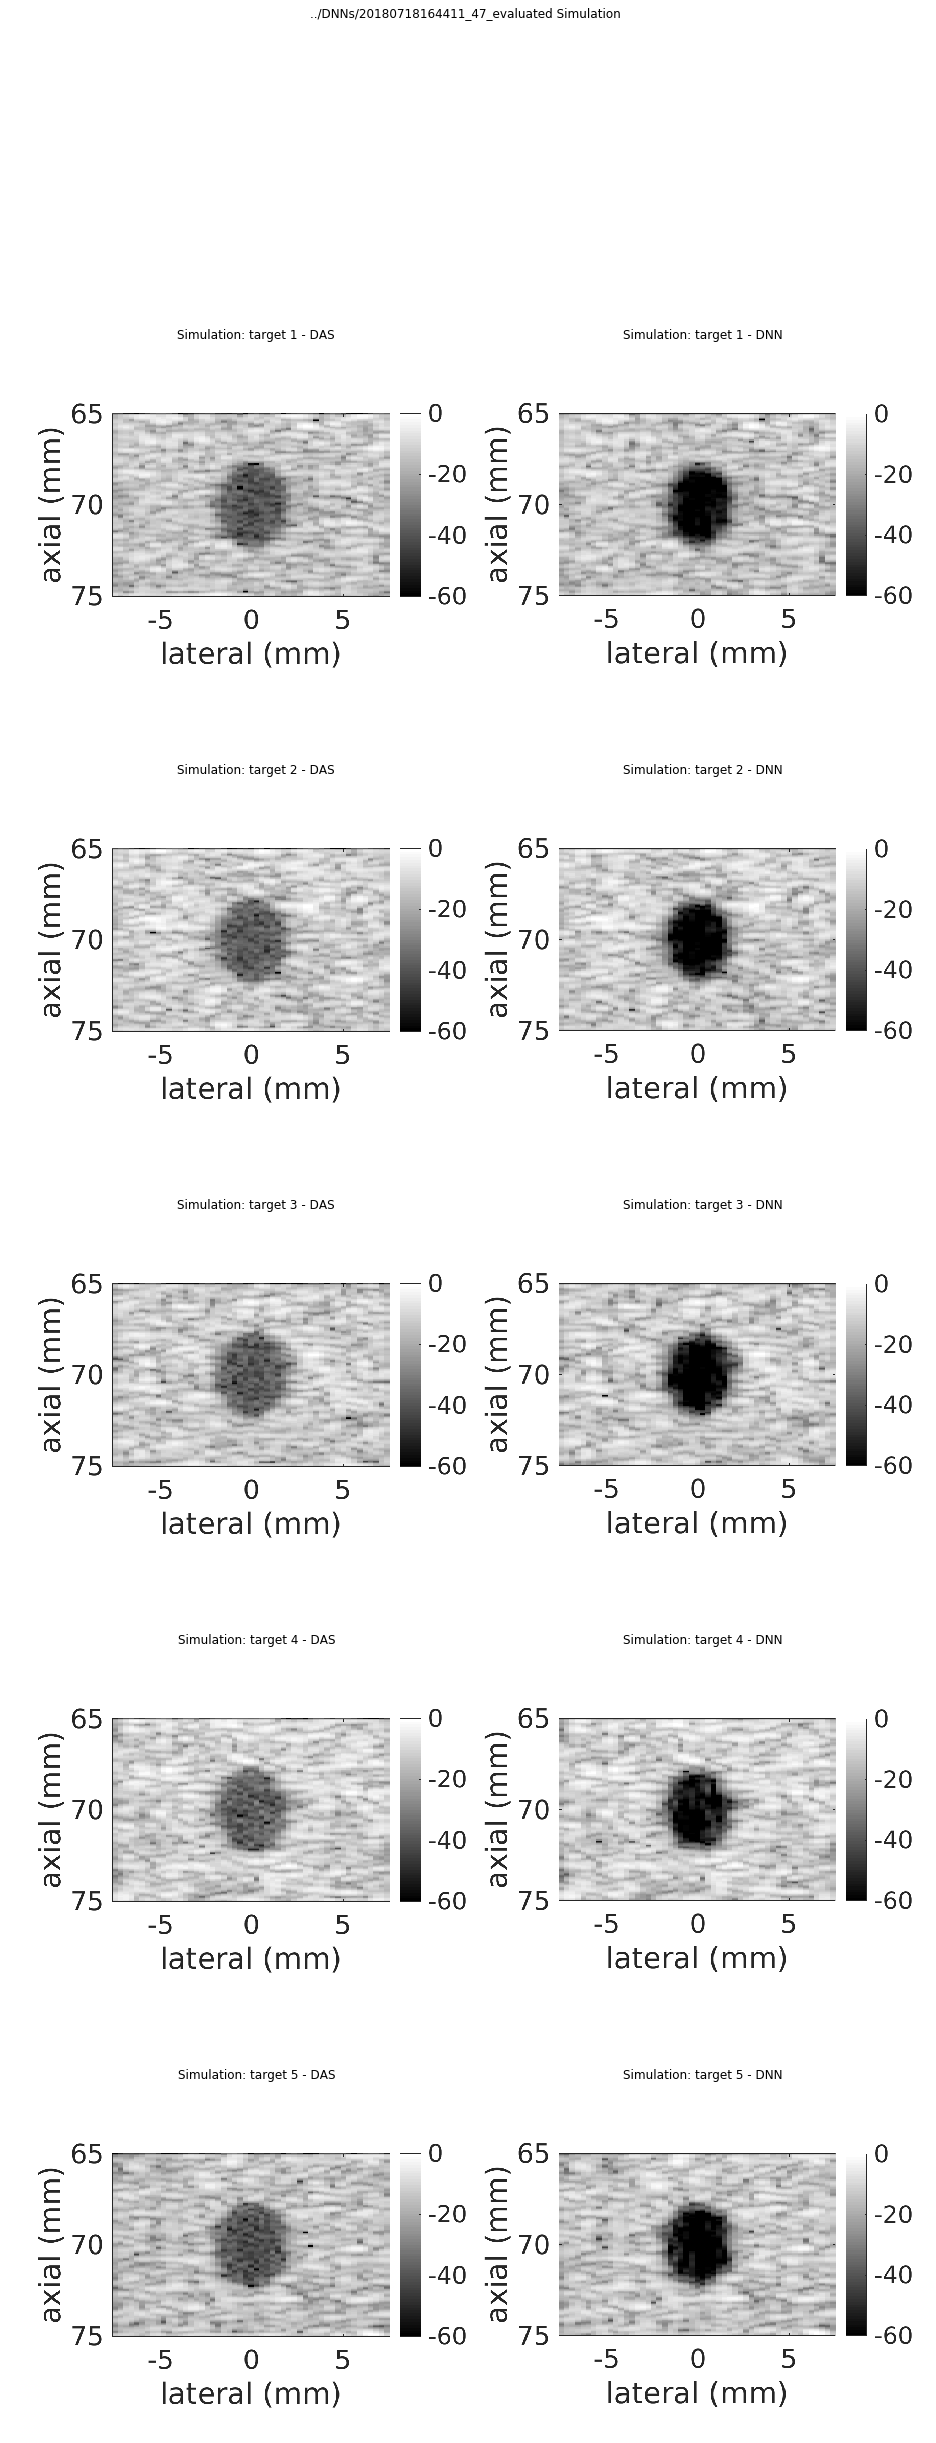

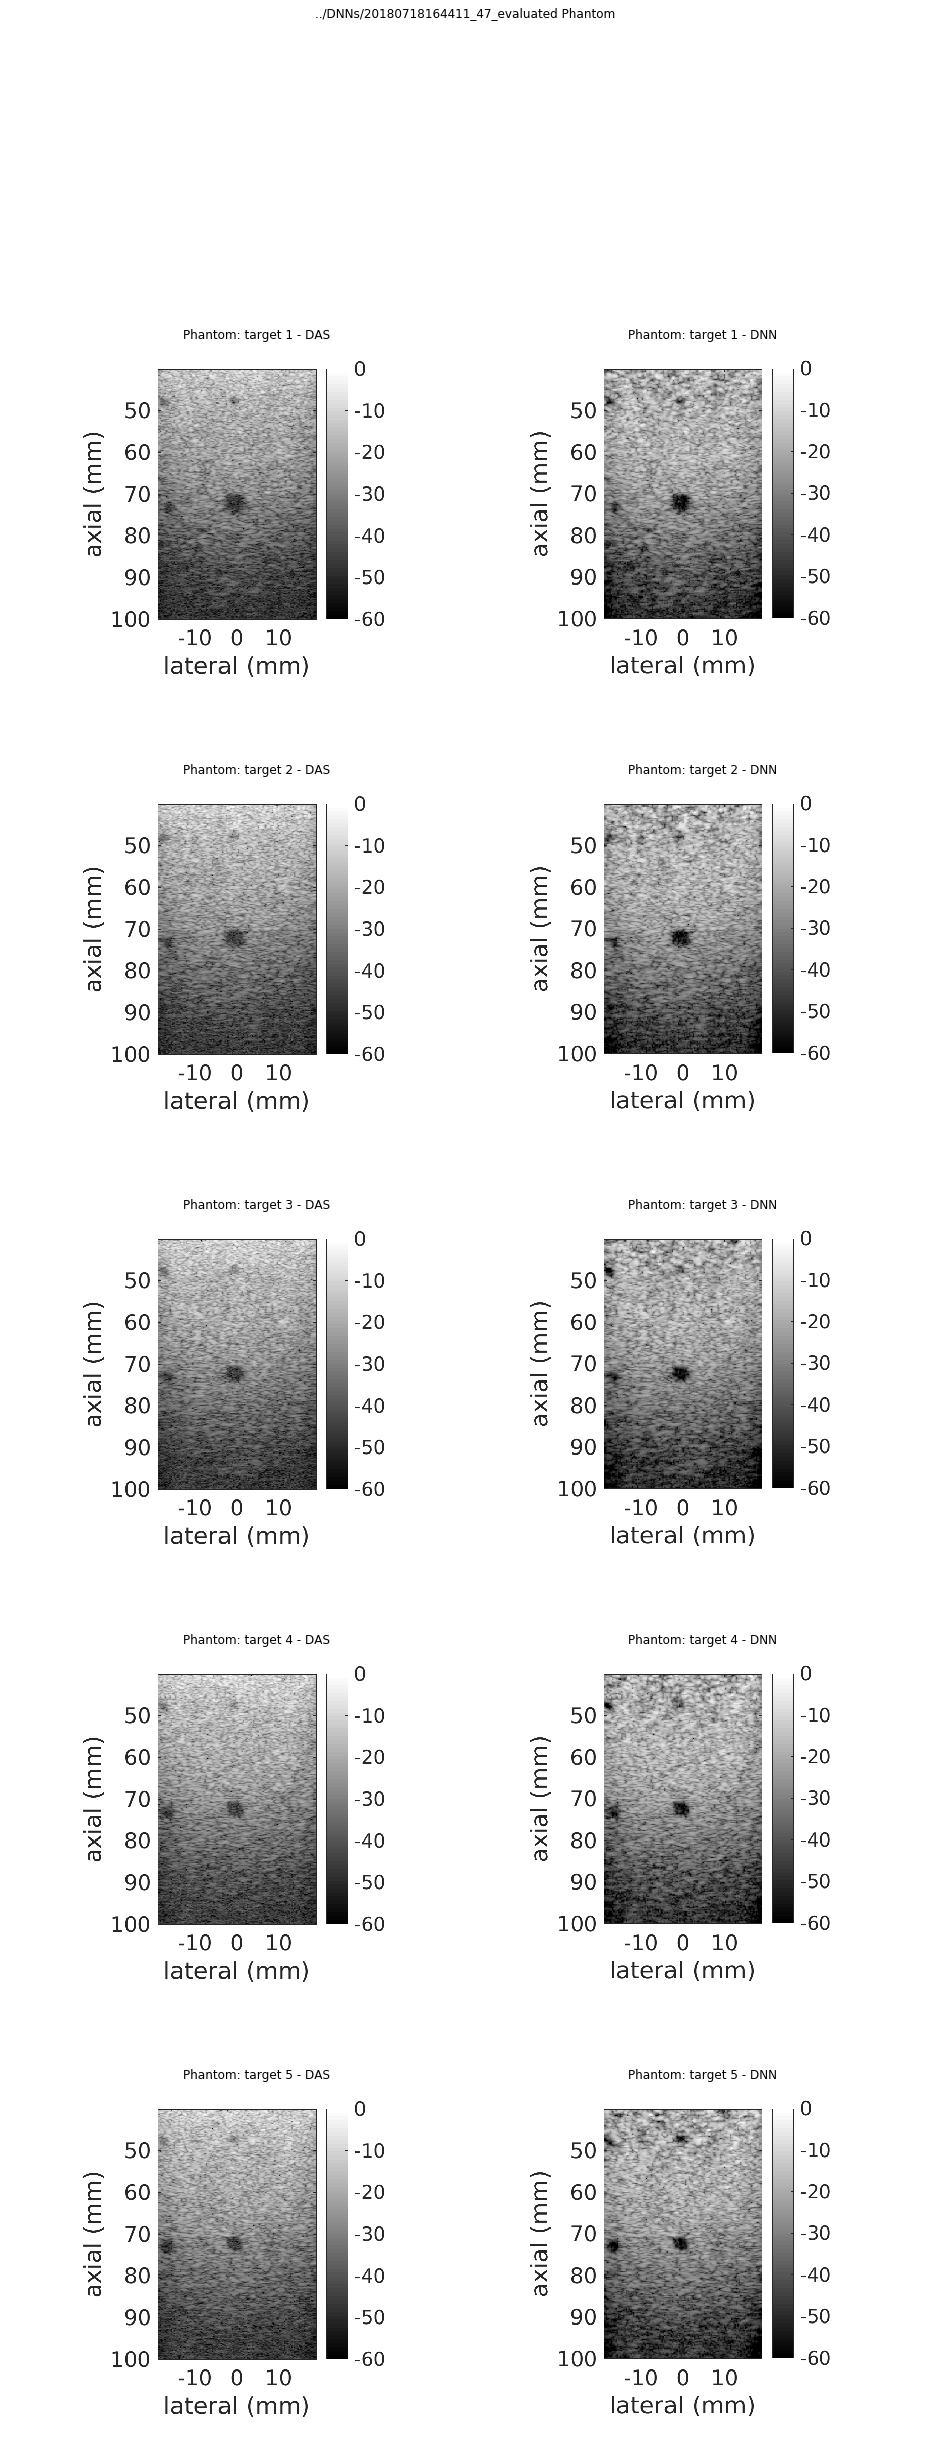

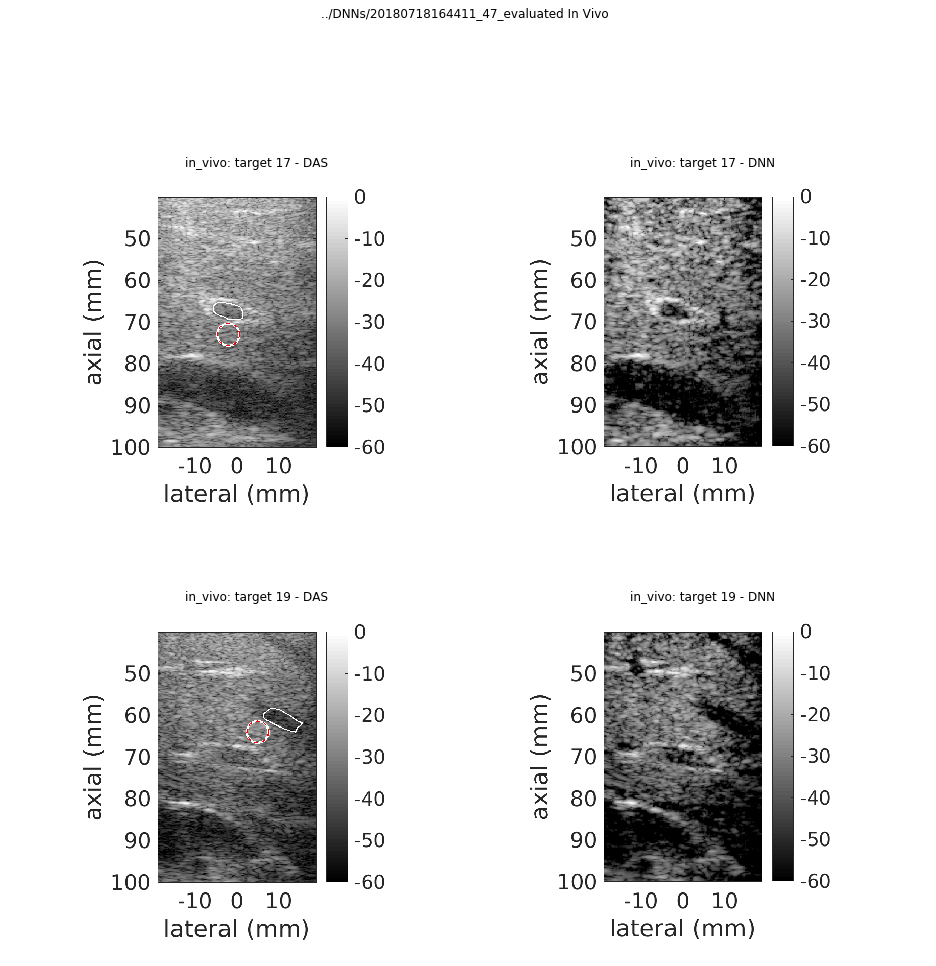


model 2 of 6 :  20180801163205_9_evaluated


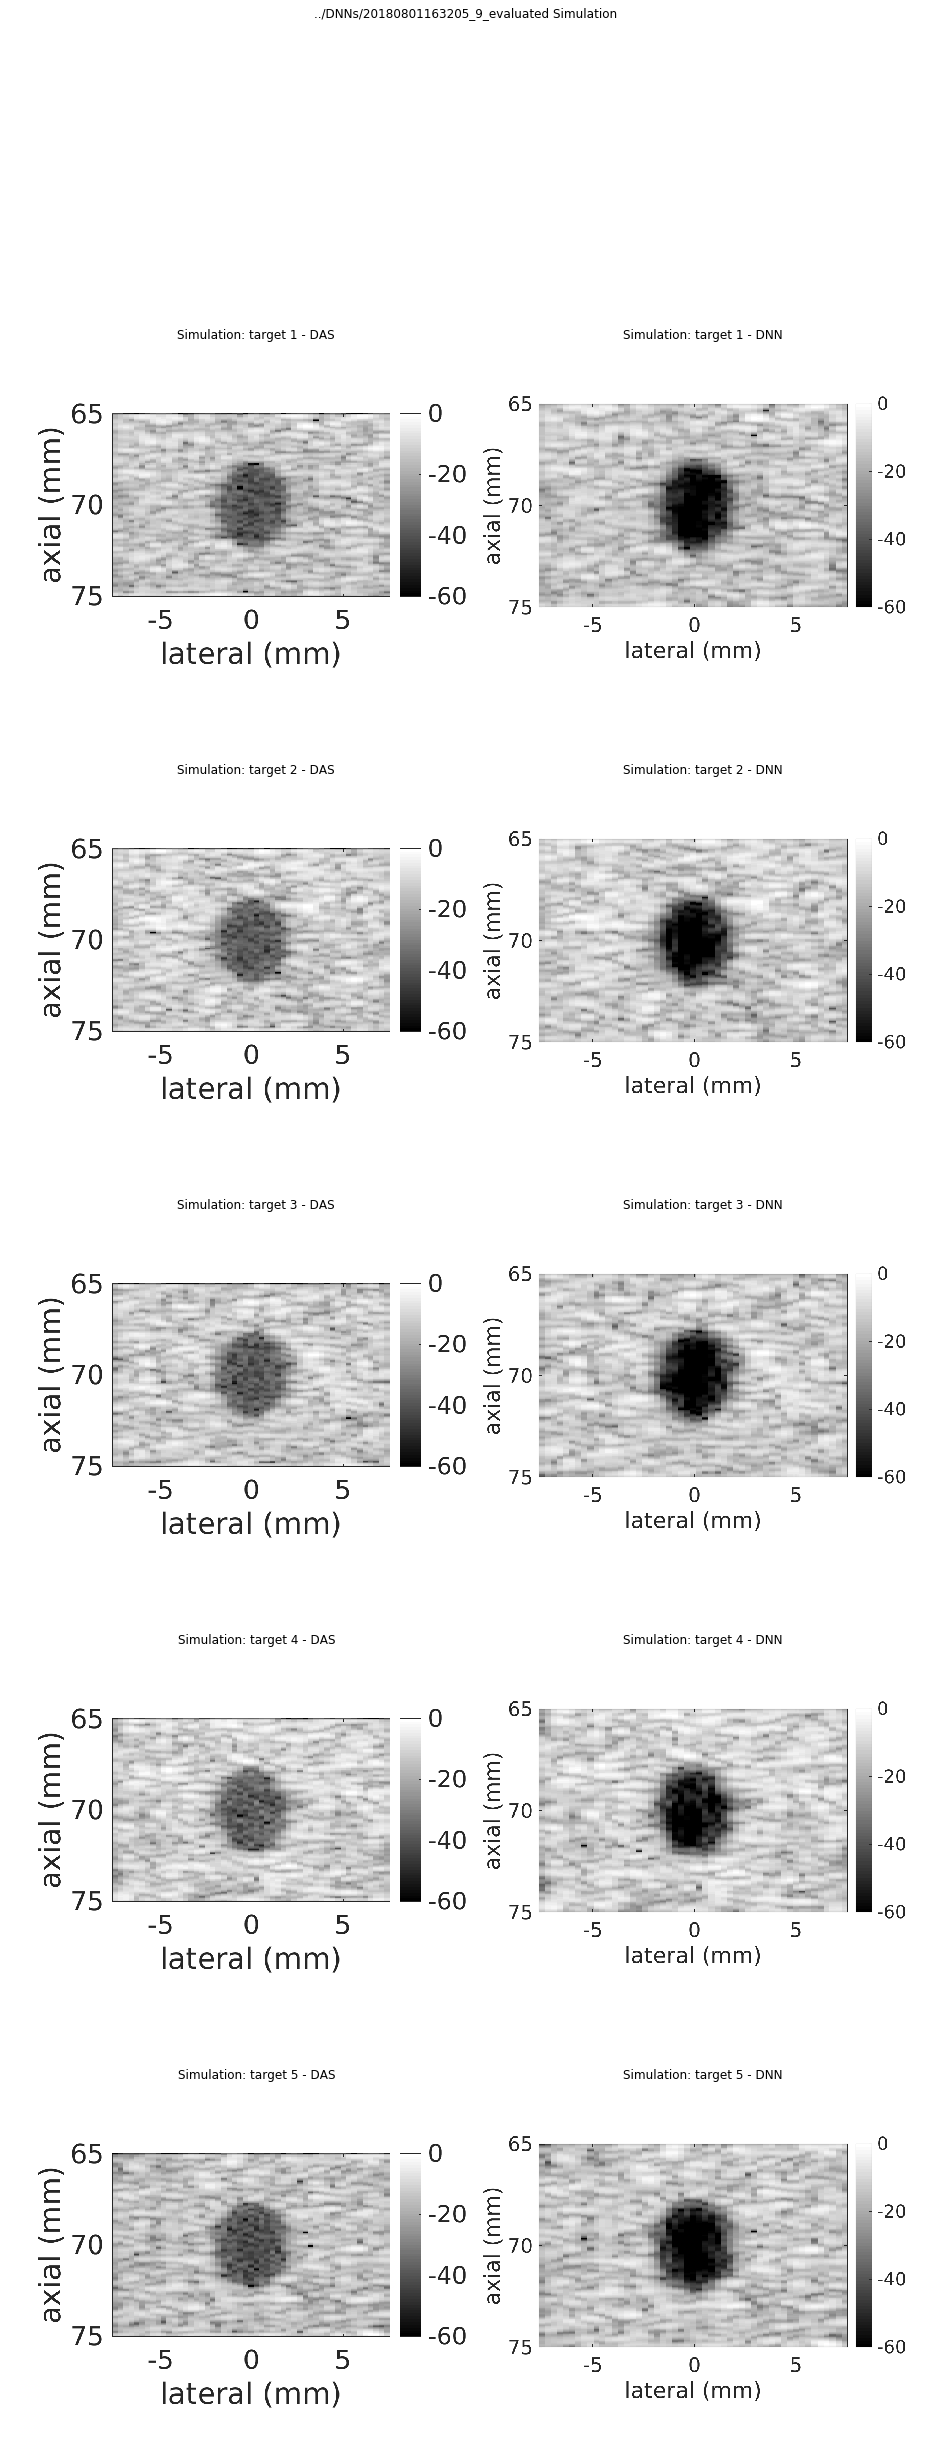

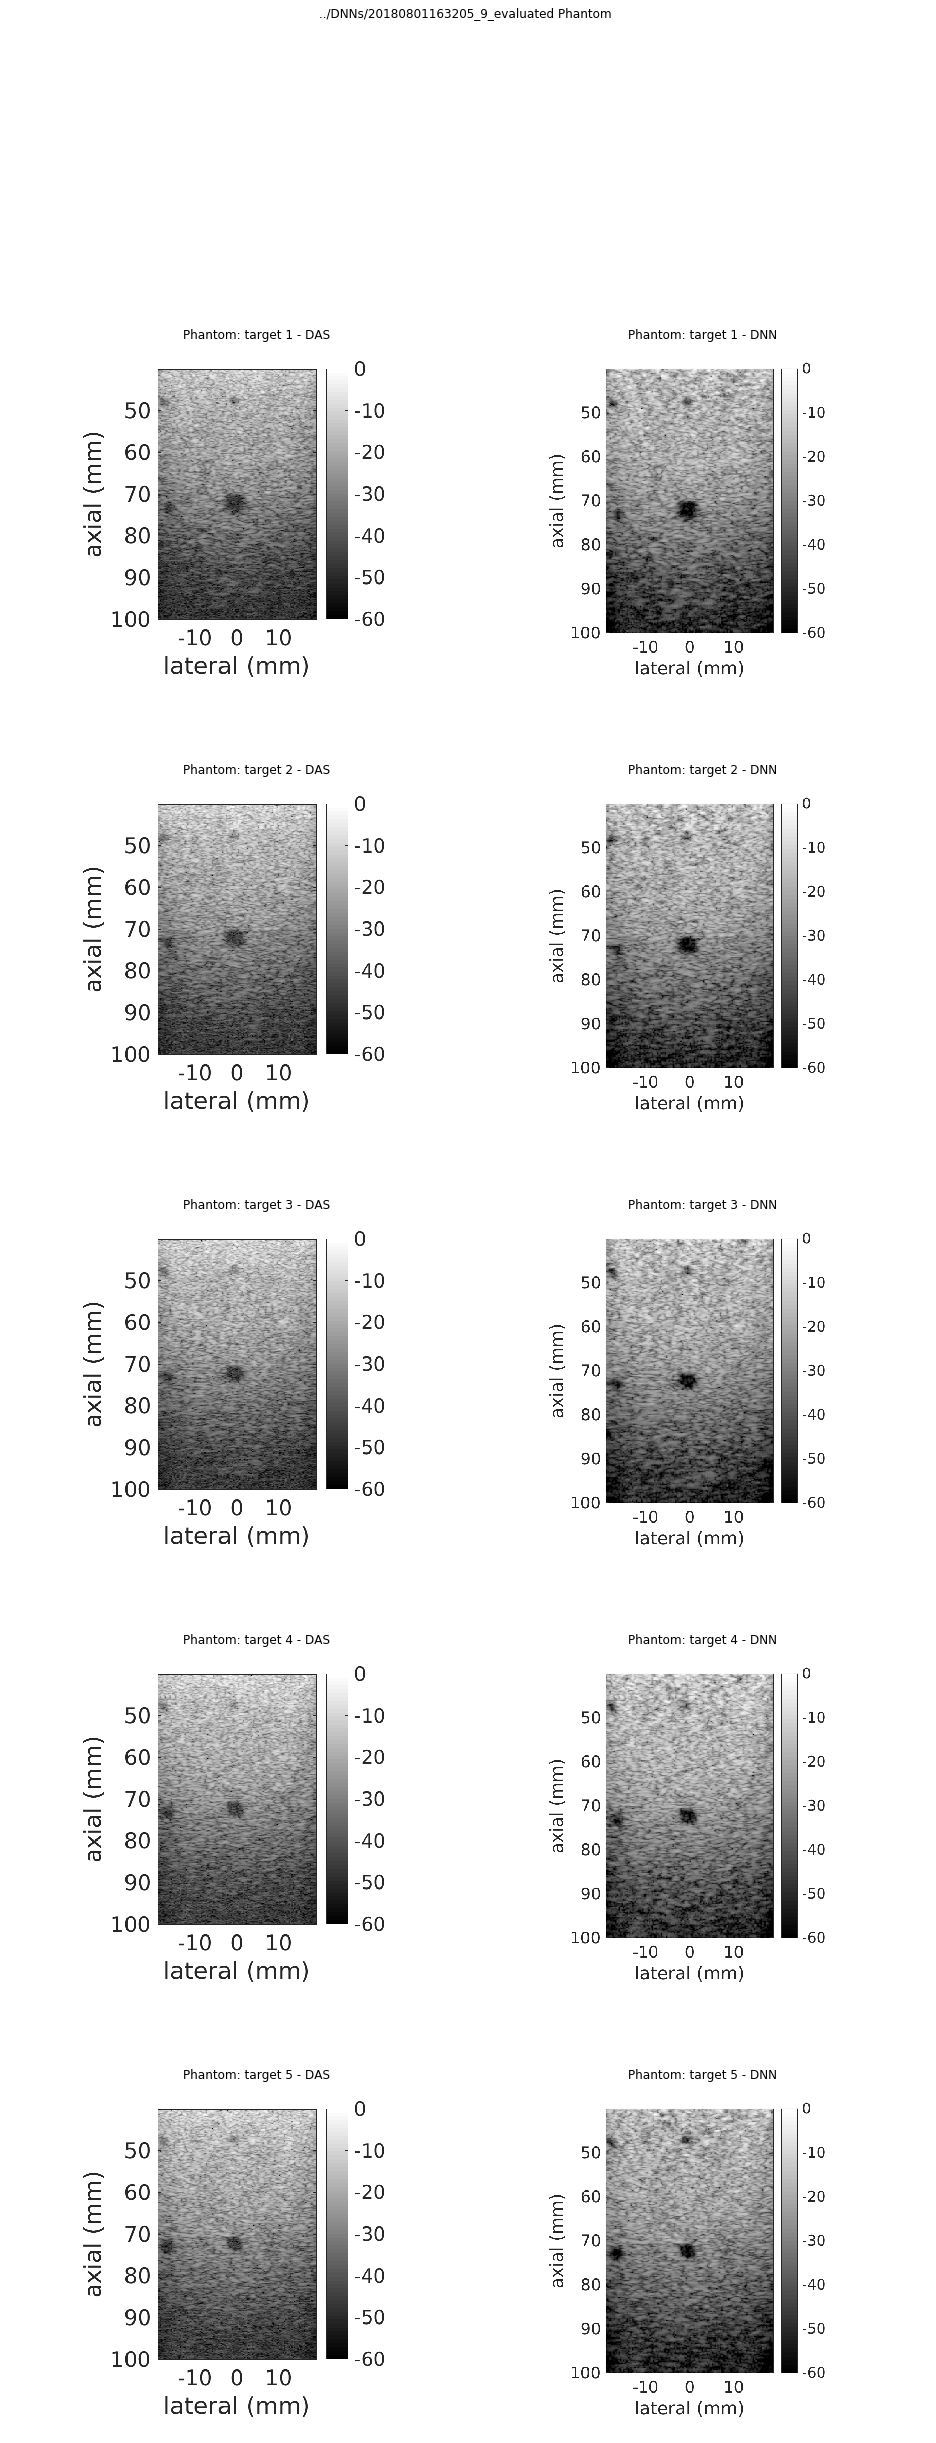

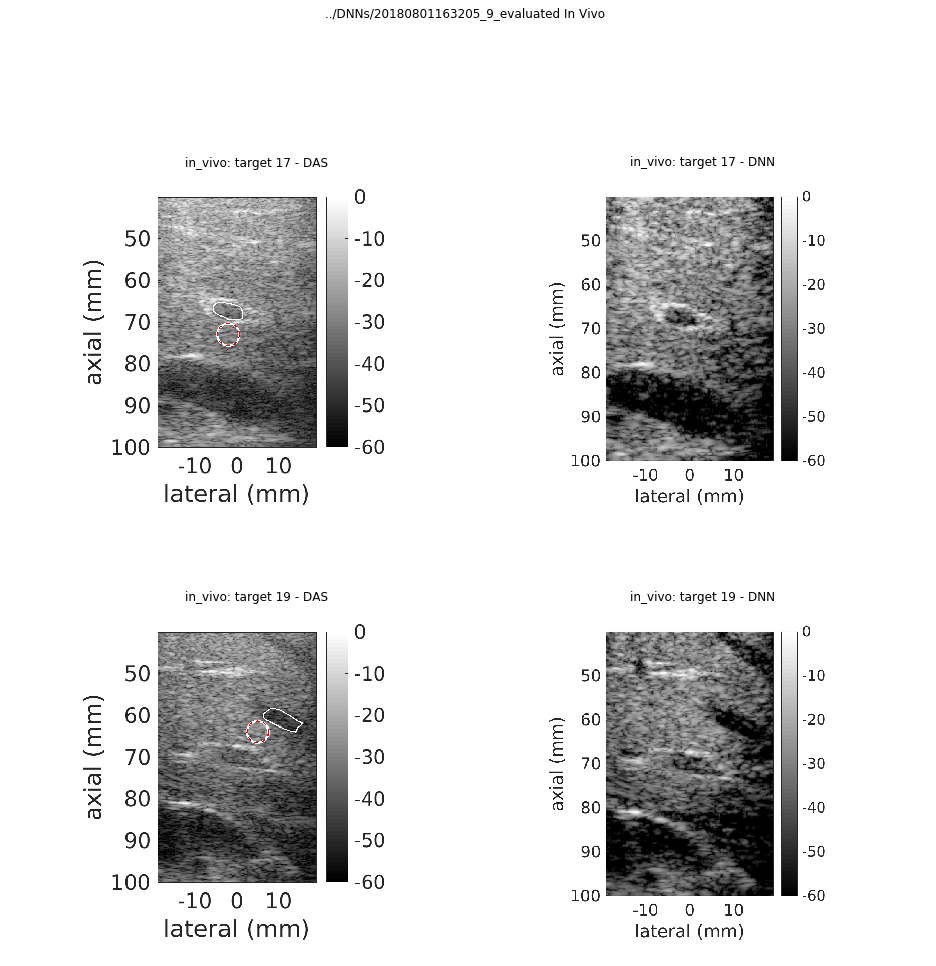


model 3 of 6 :  20180801163205_39_evaluated


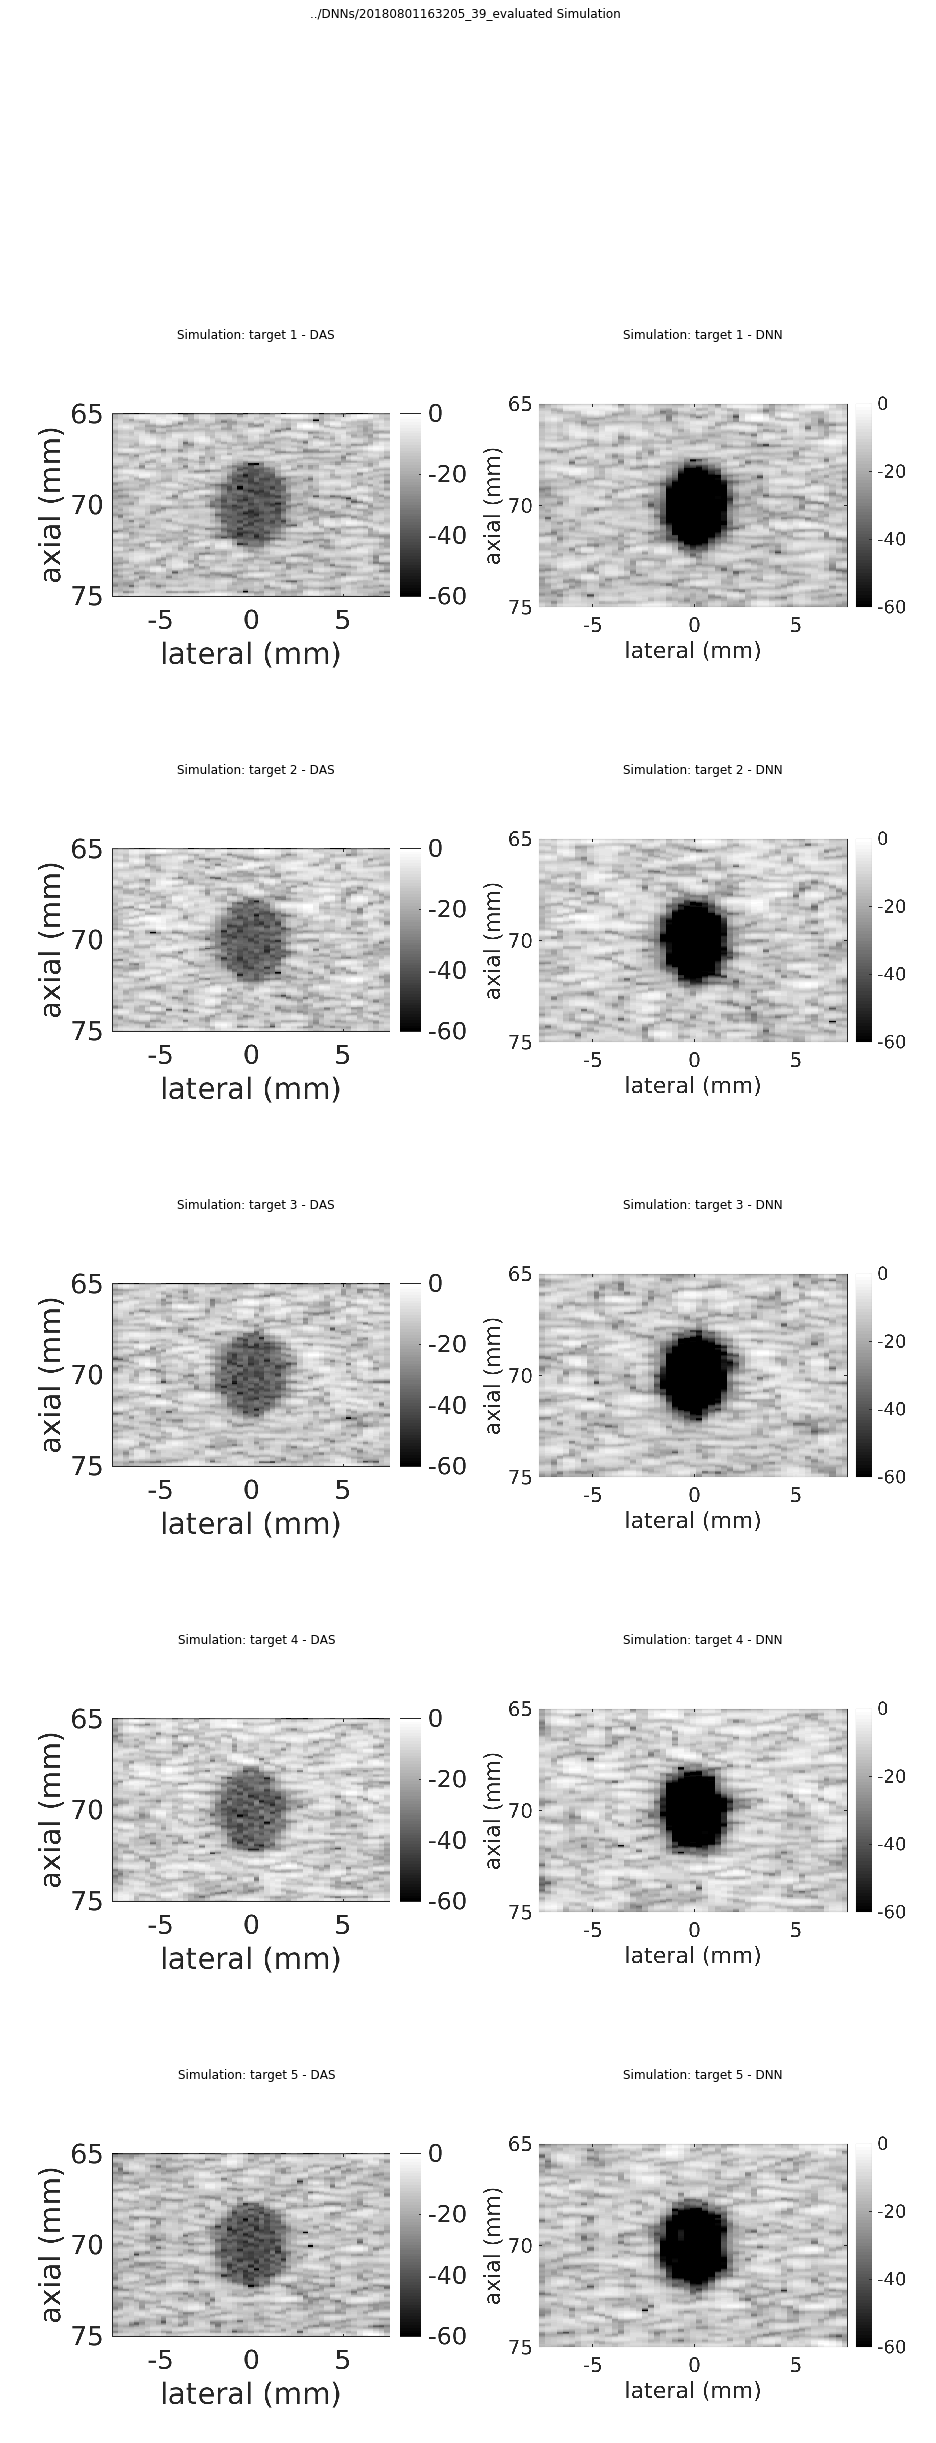

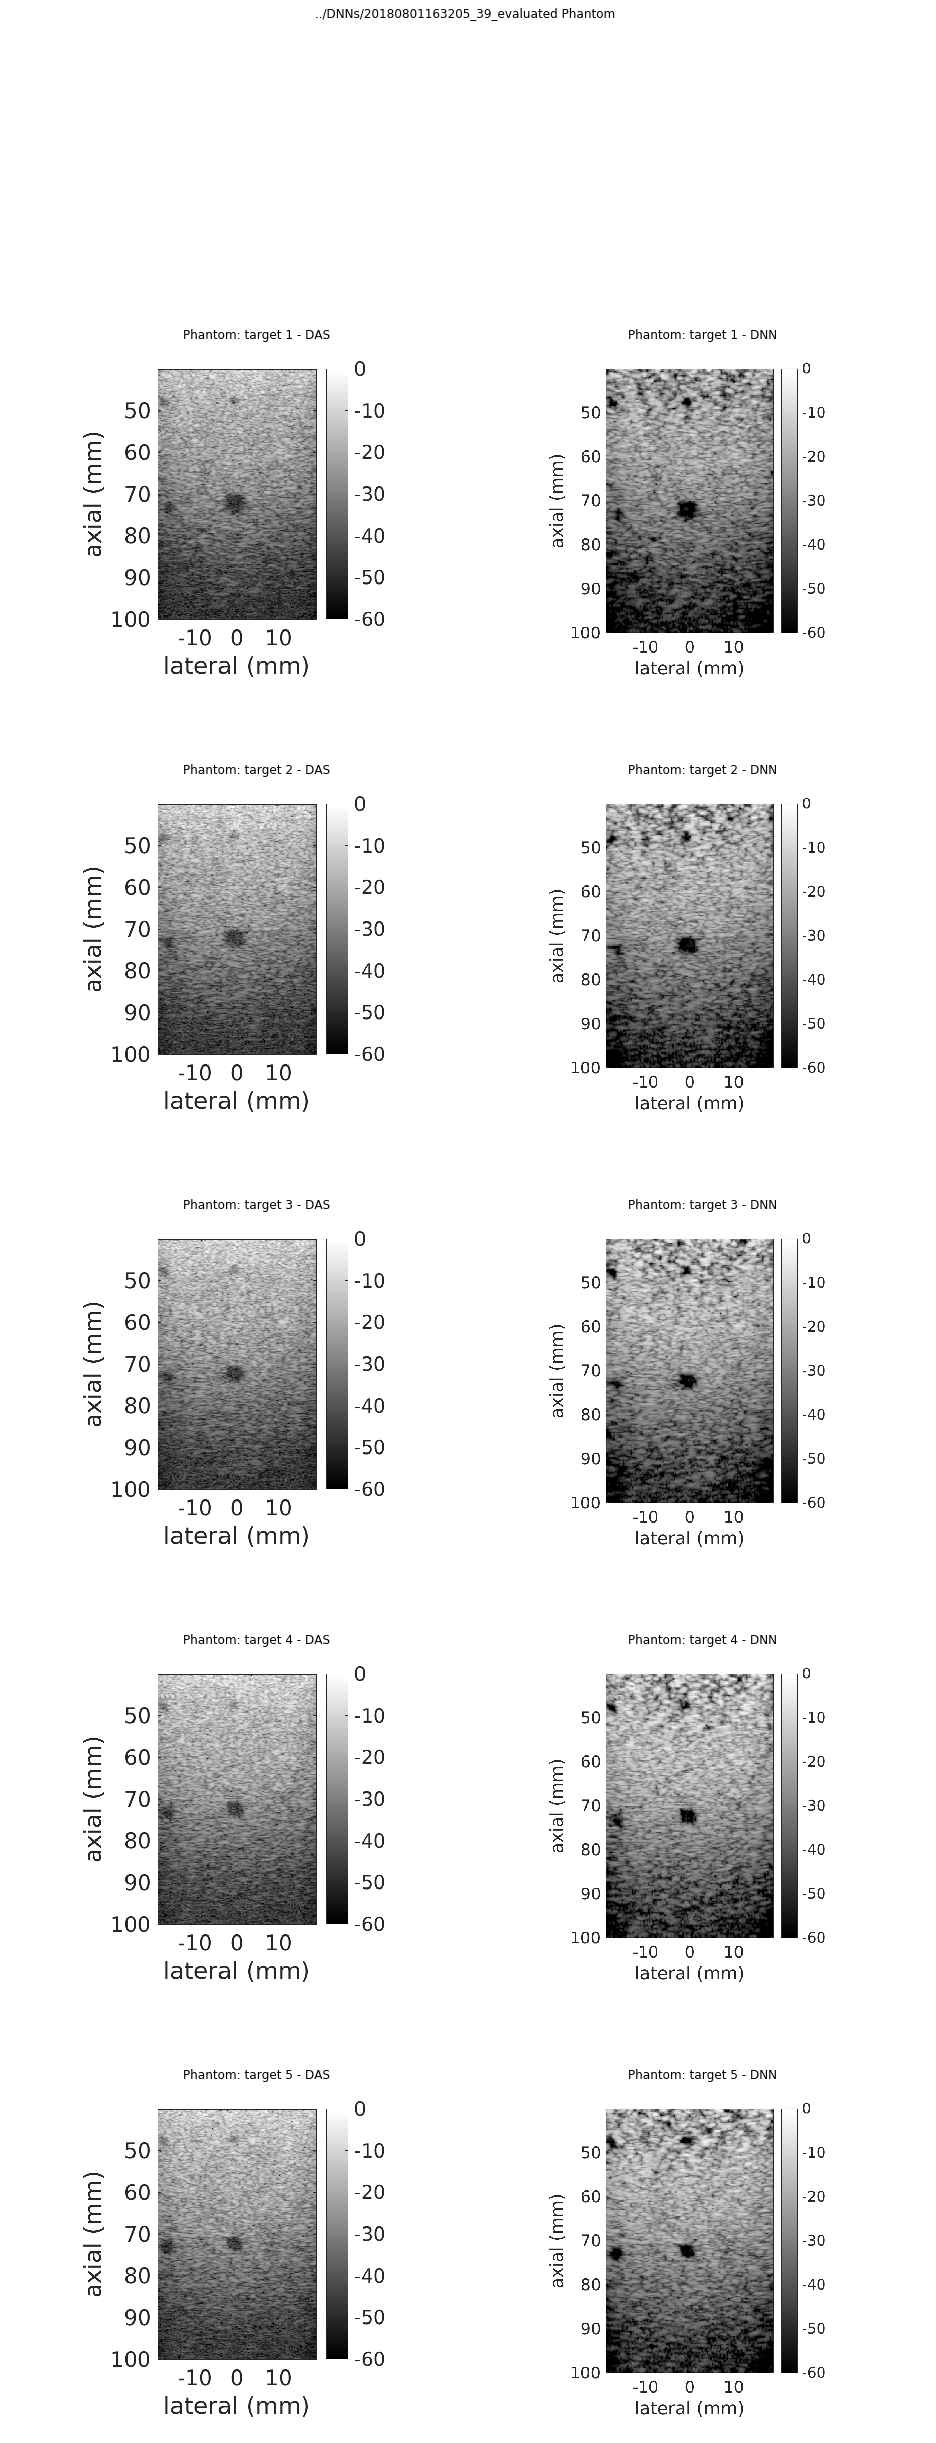

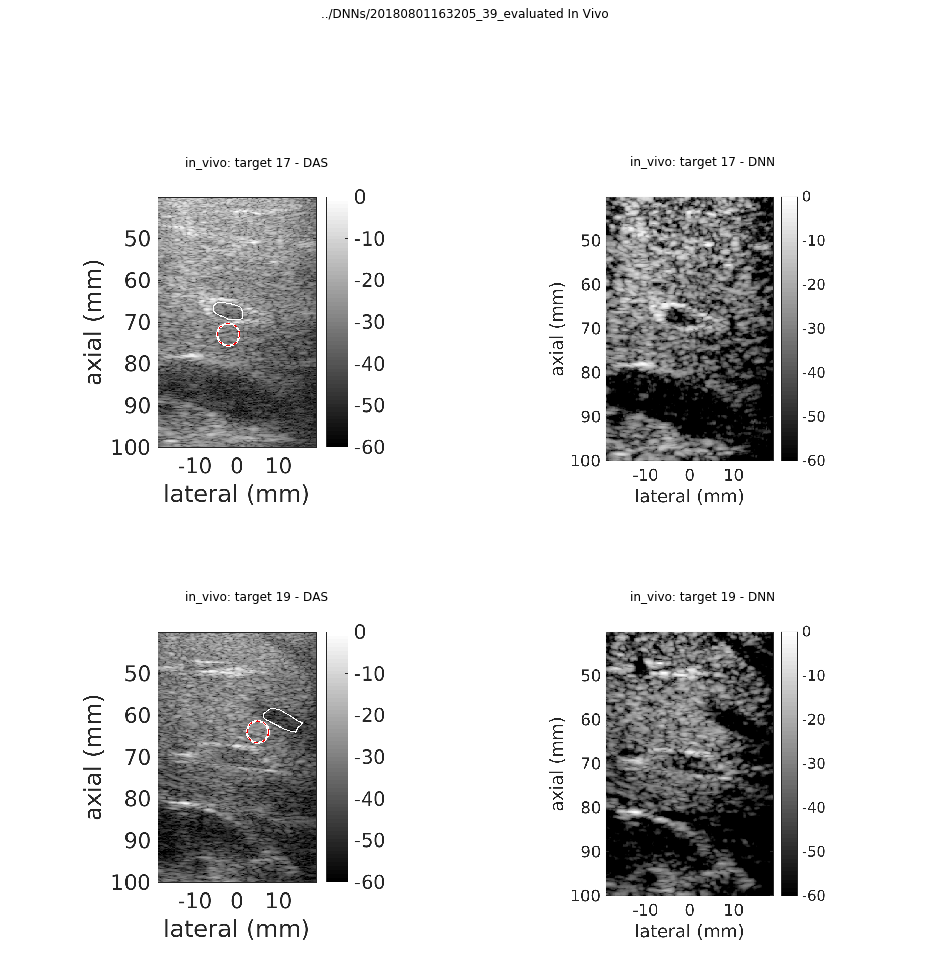


model 4 of 6 :  20180705164352_46_evaluated


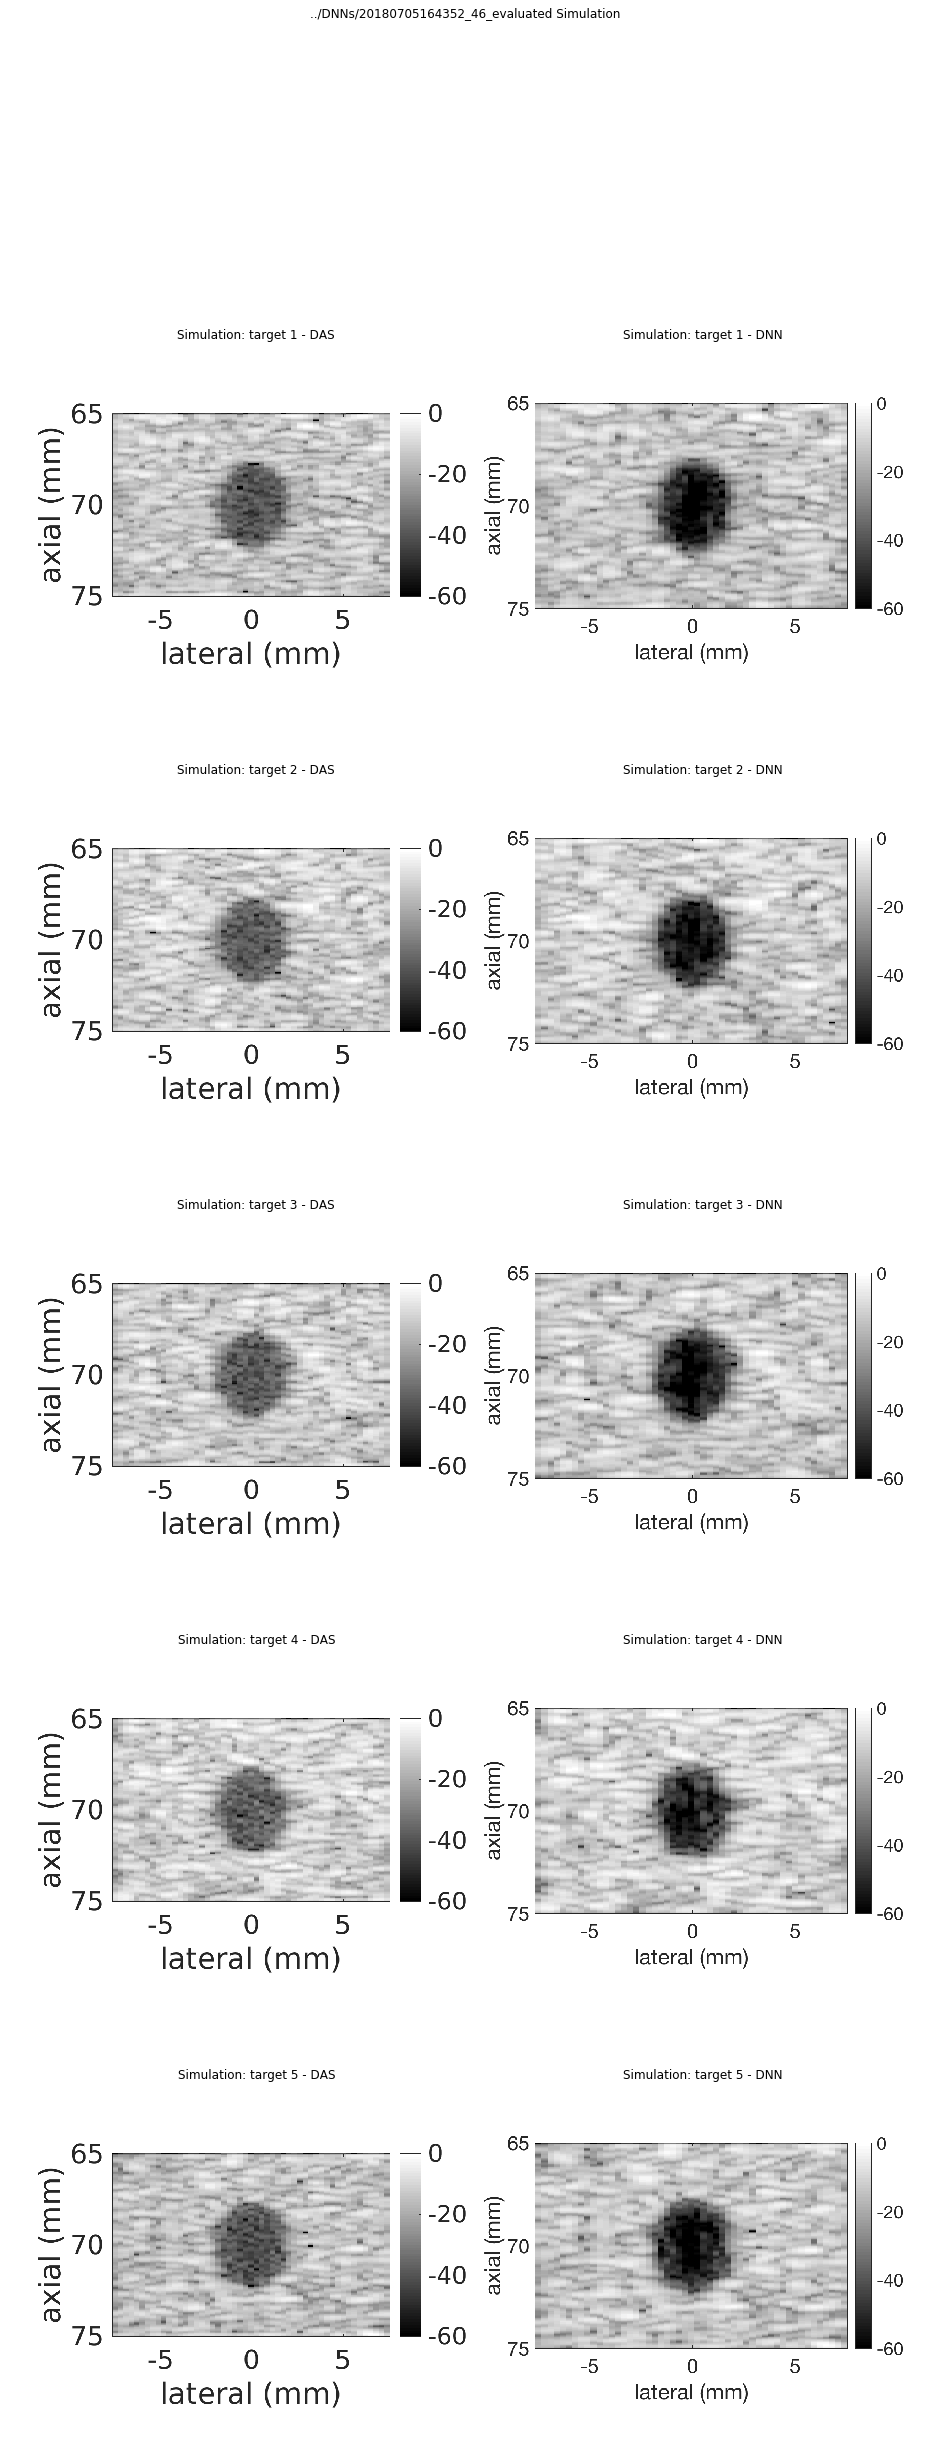

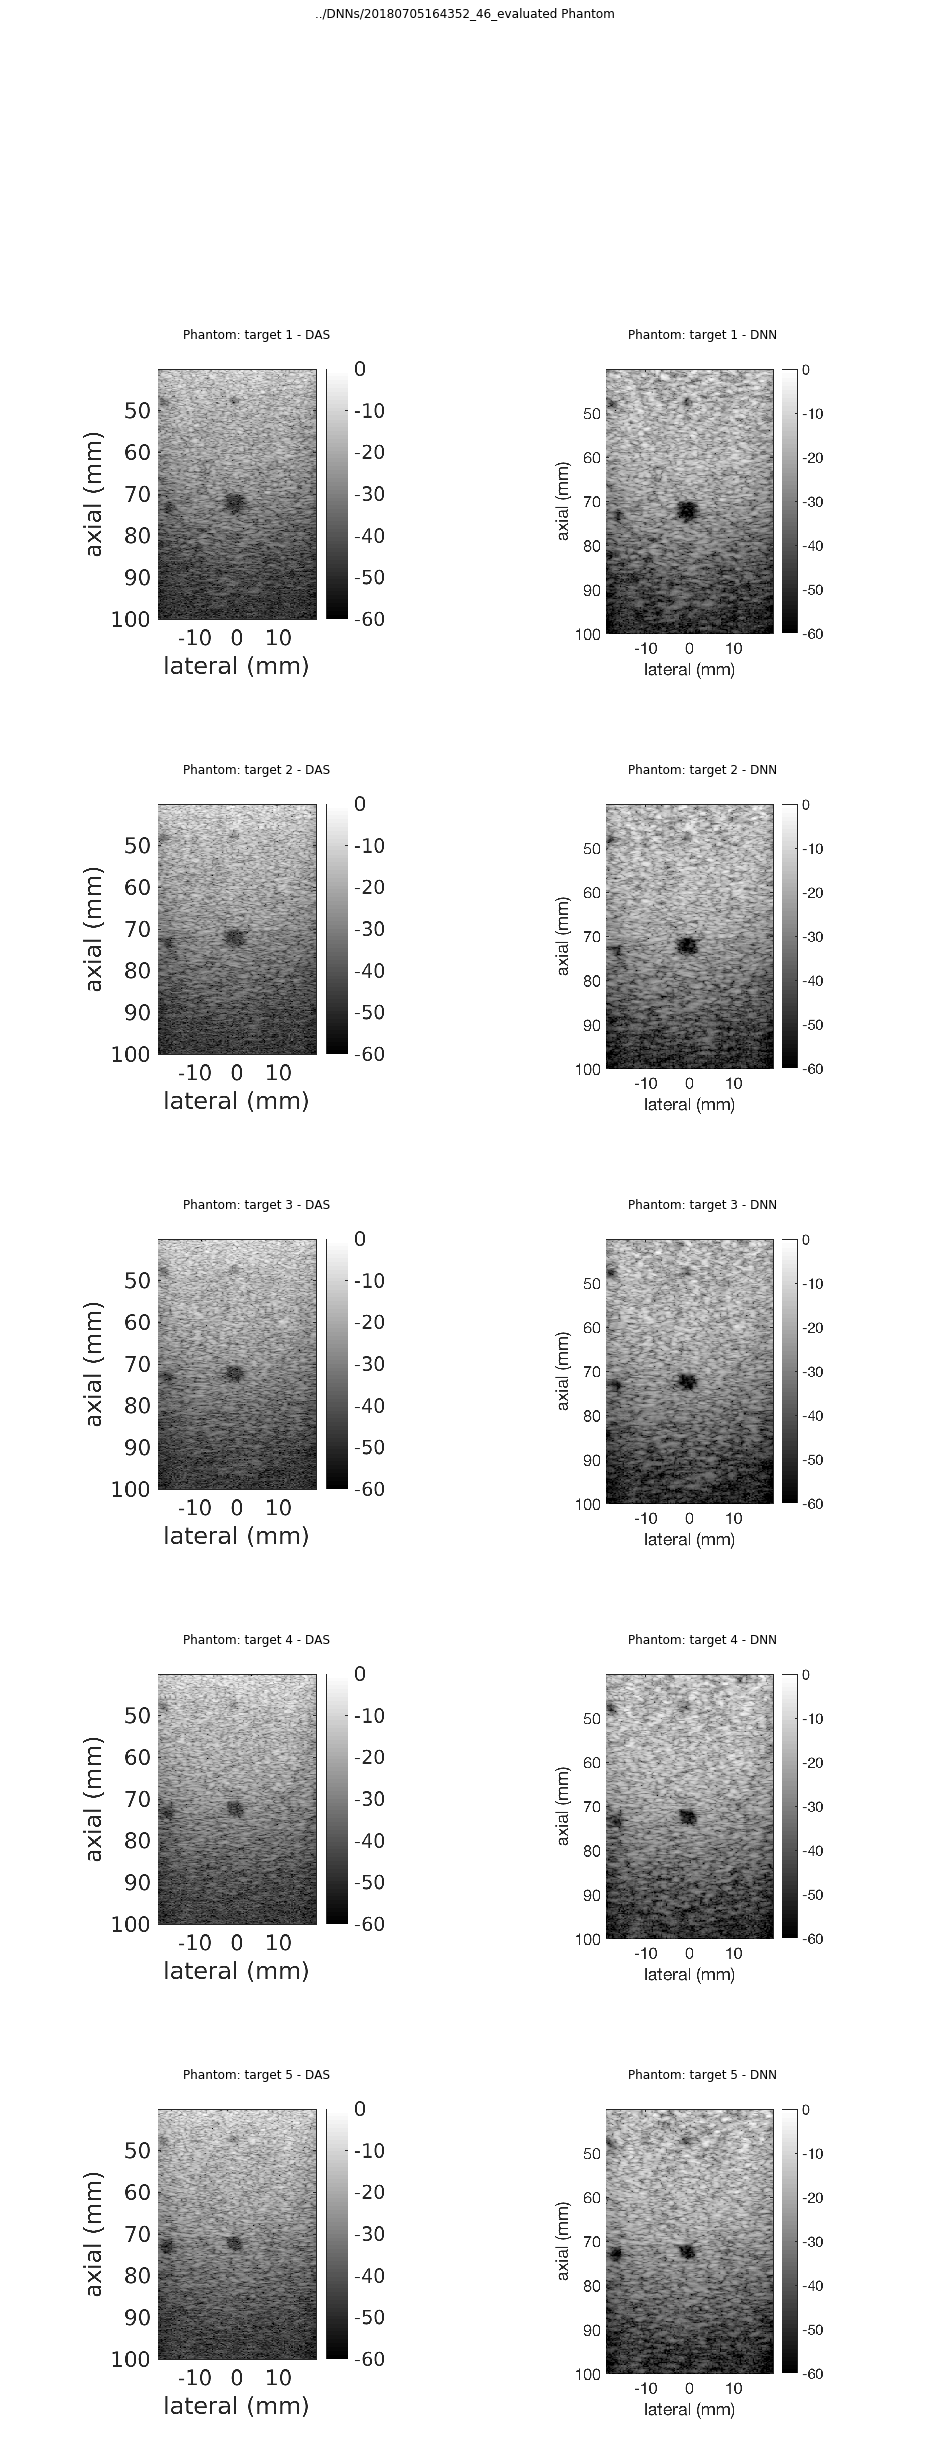

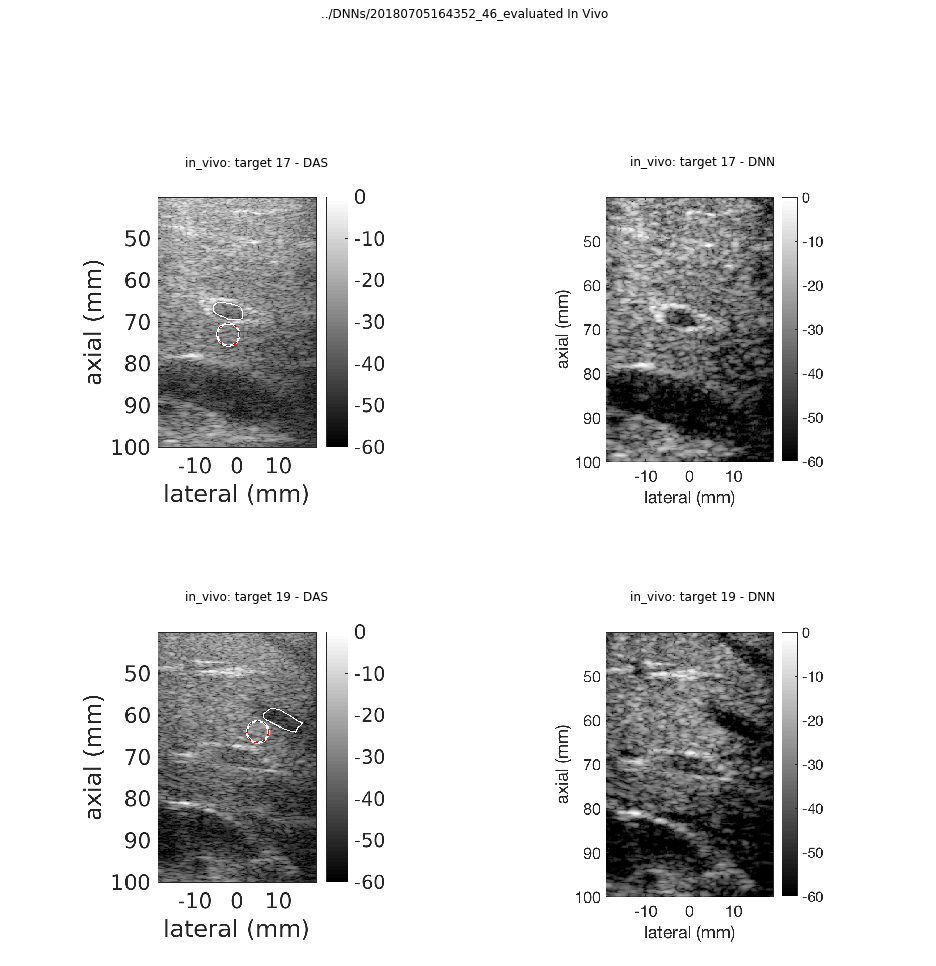


model 5 of 6 :  20180718164411_36_evaluated


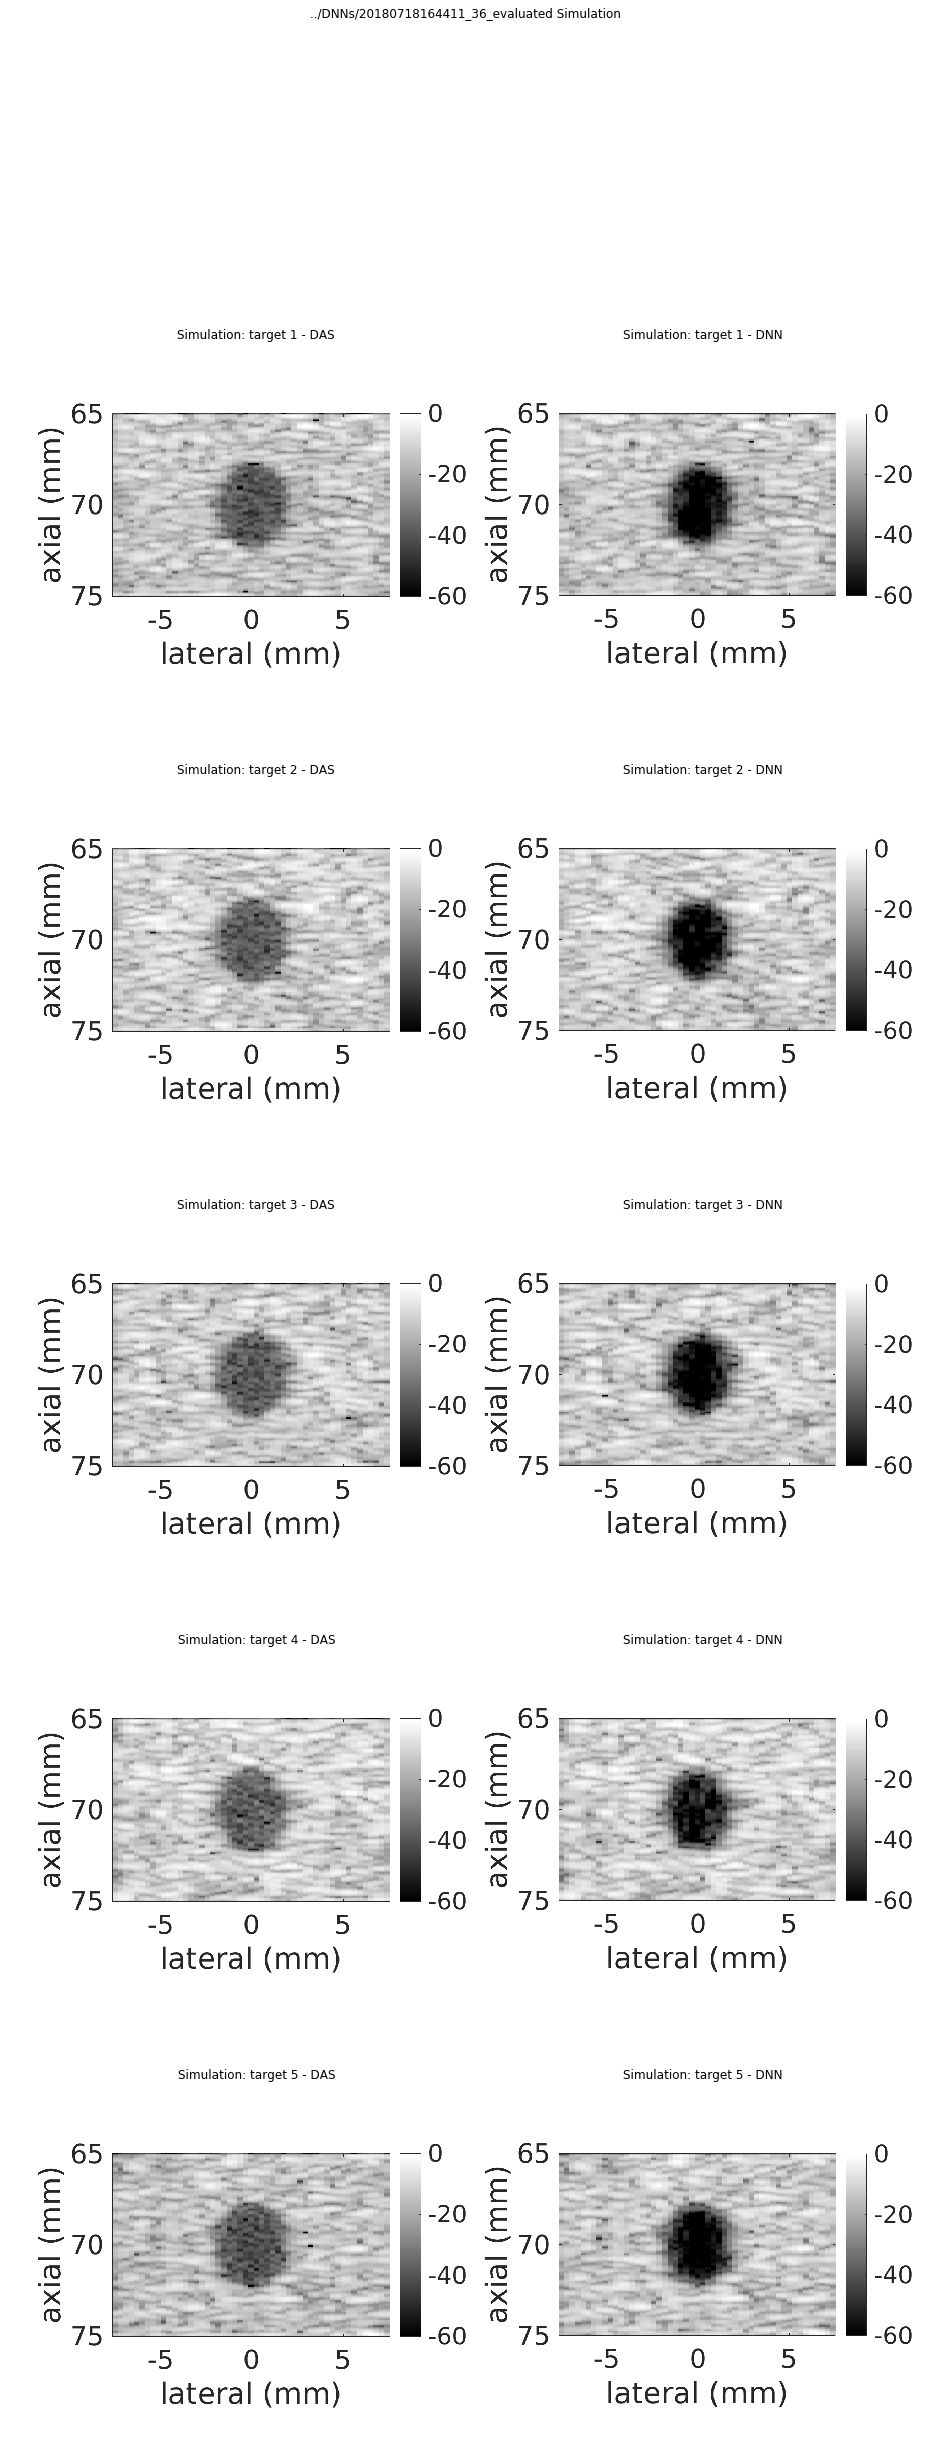

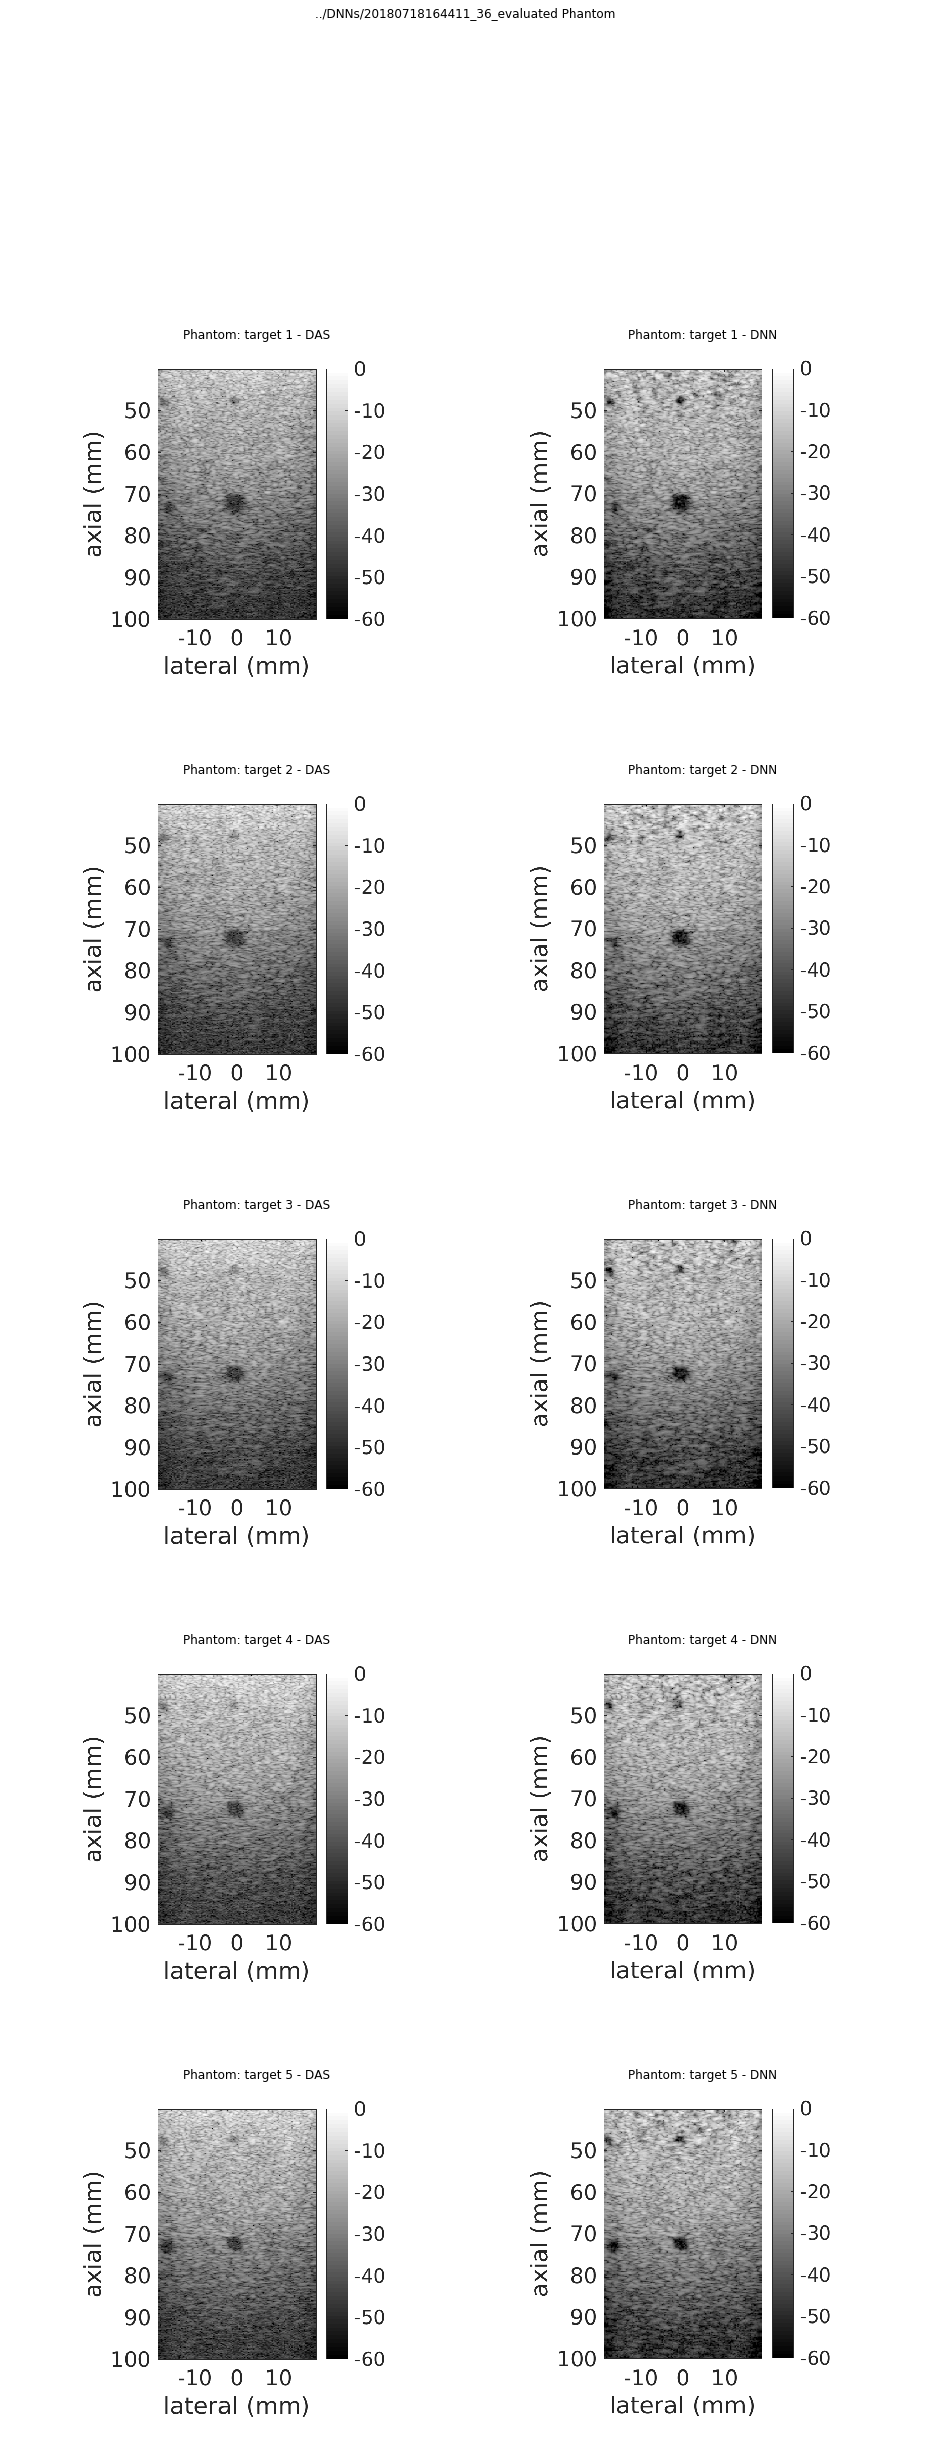

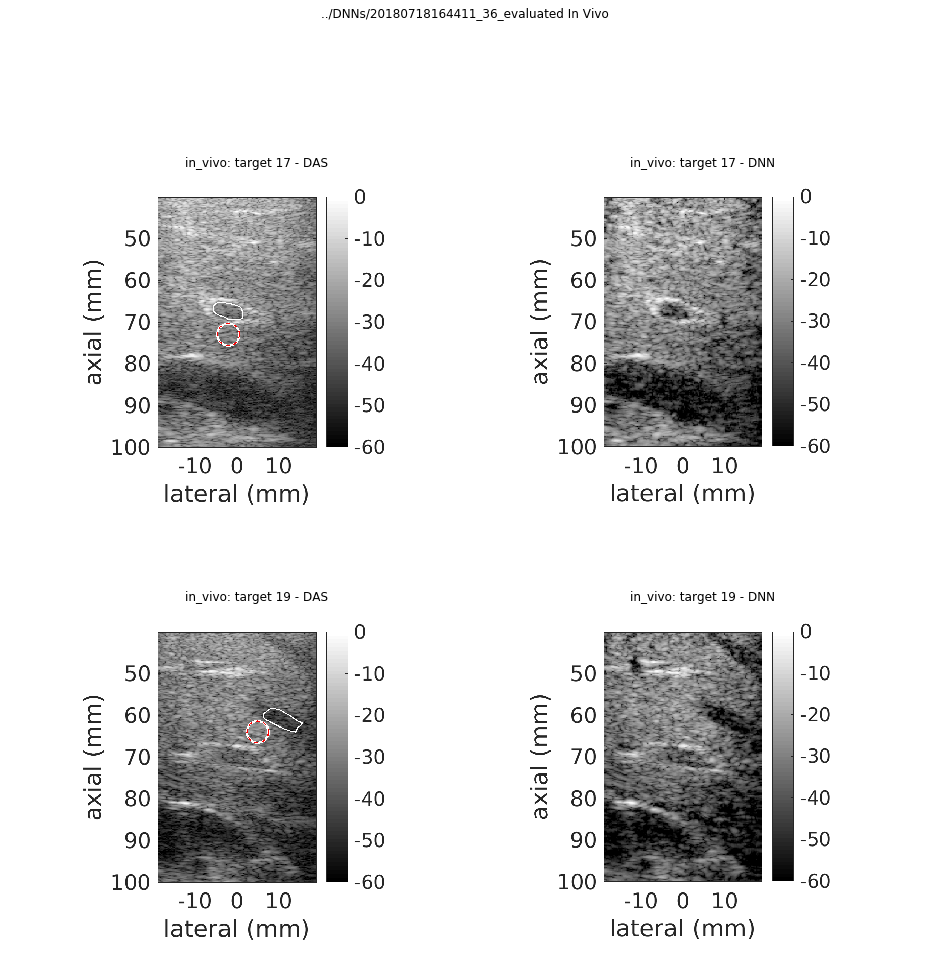


model 6 of 6 :  20180718164411_23_evaluated


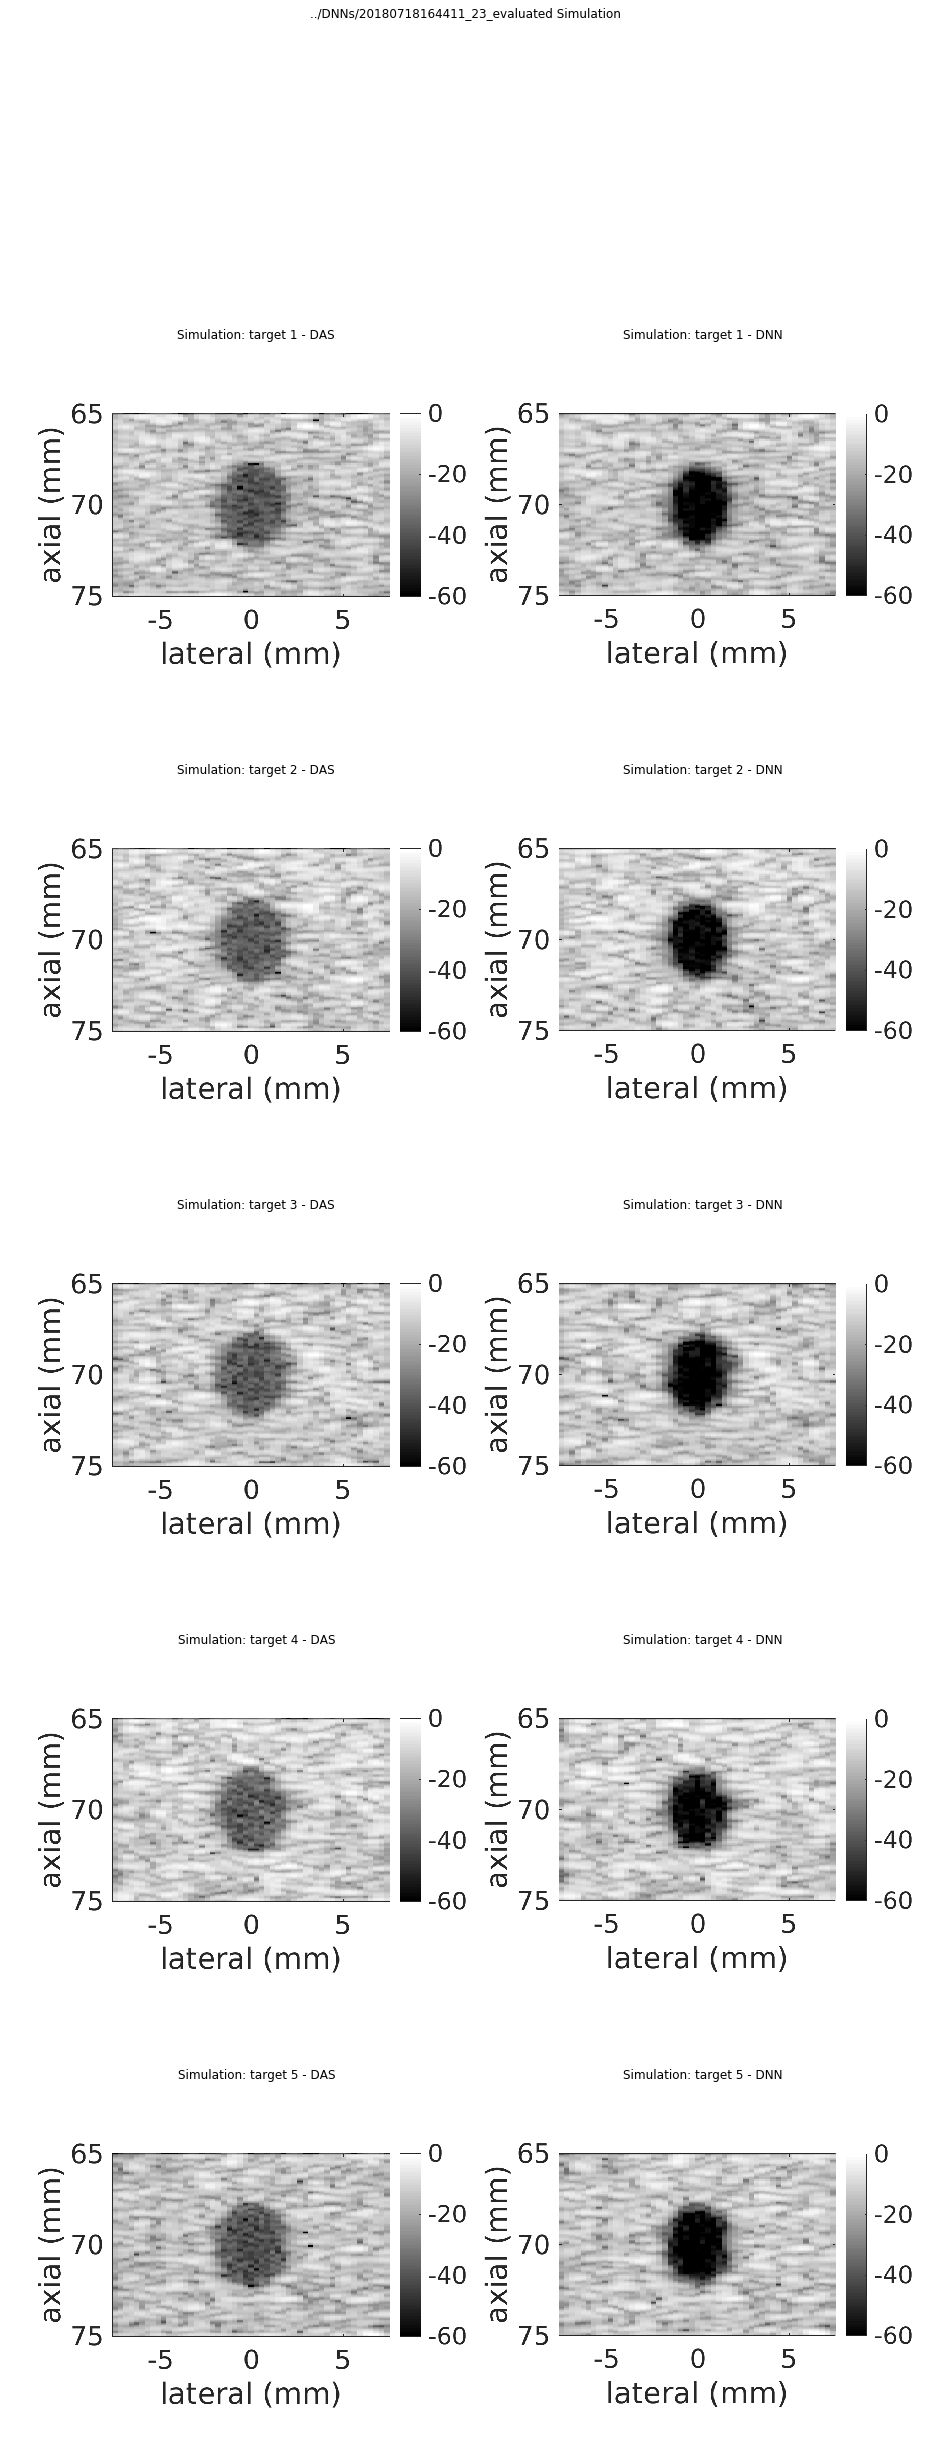

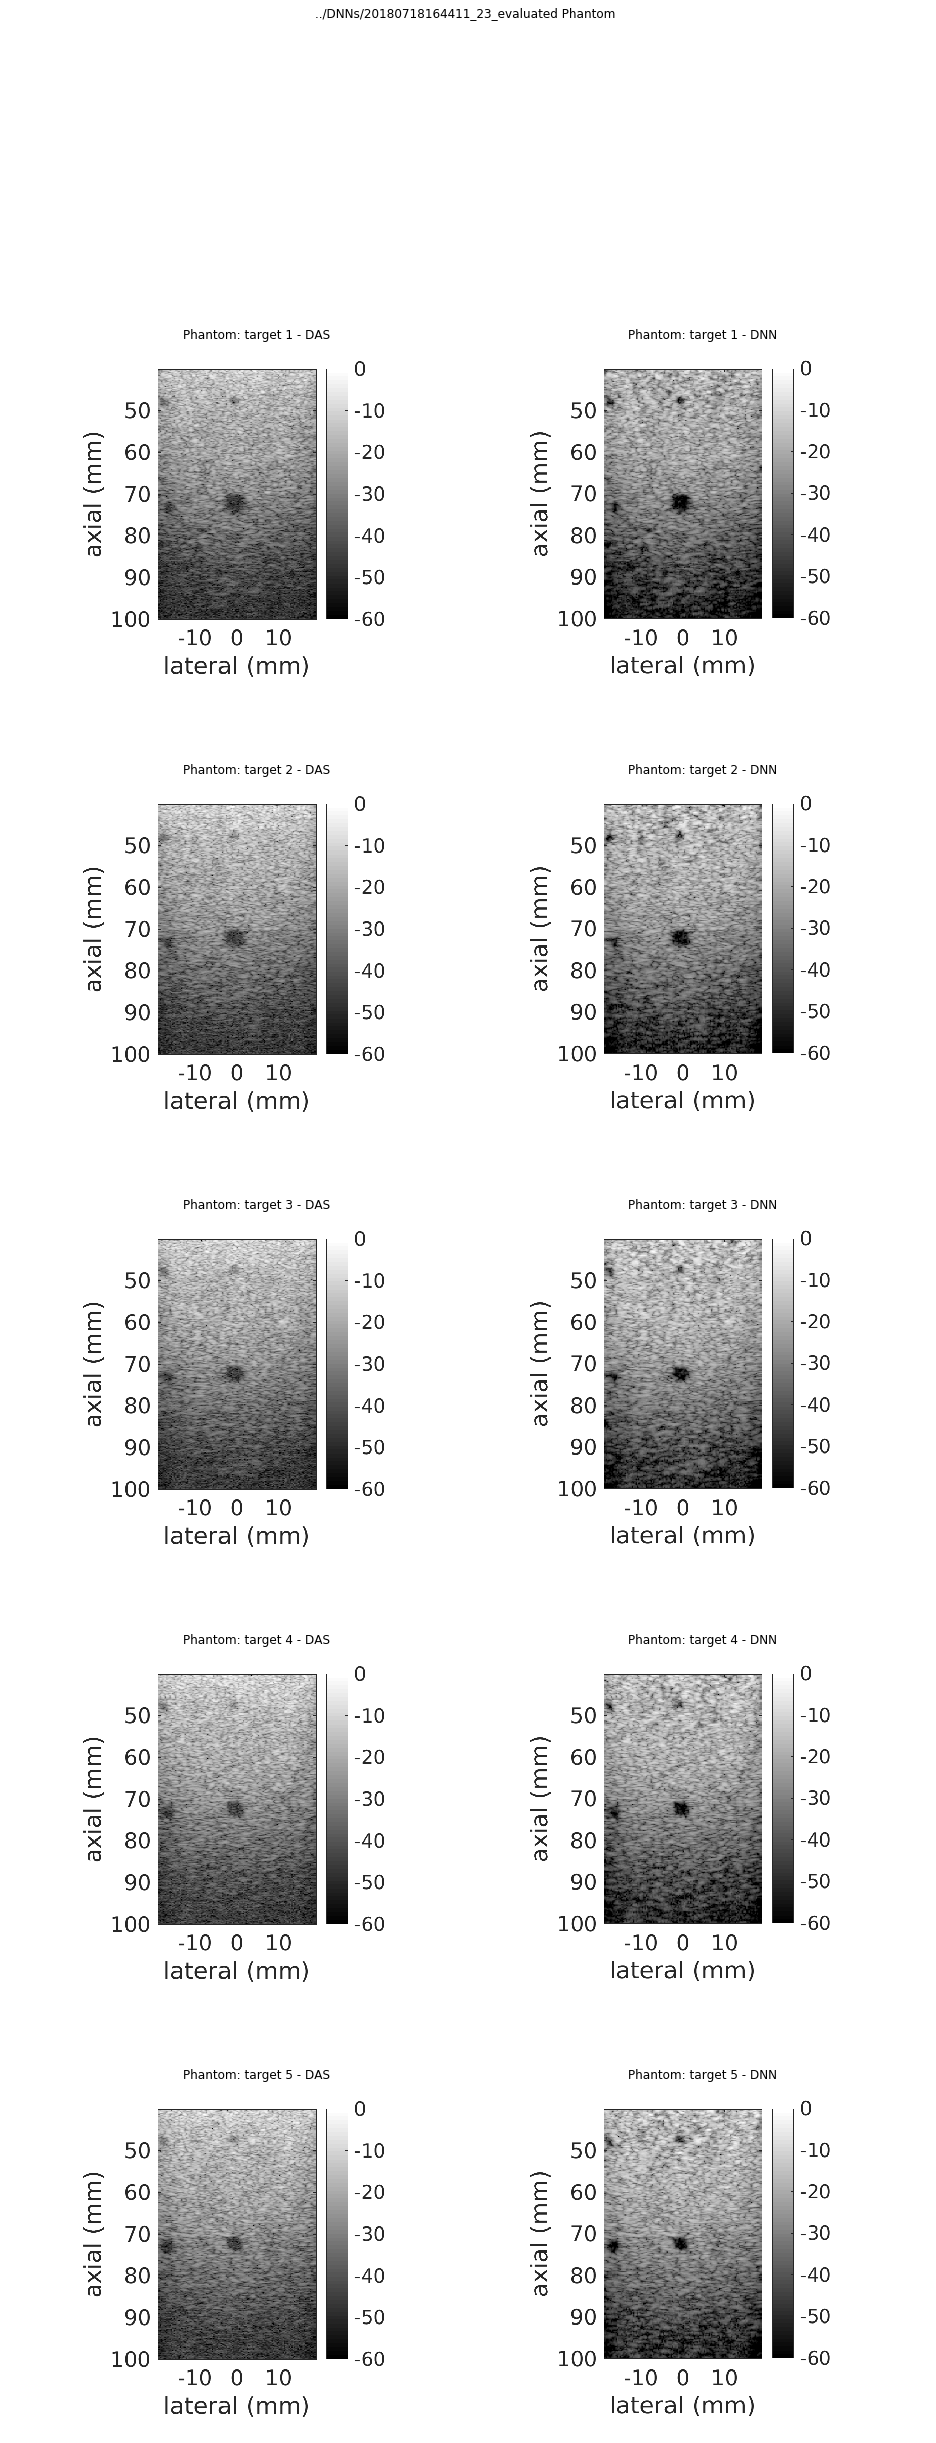

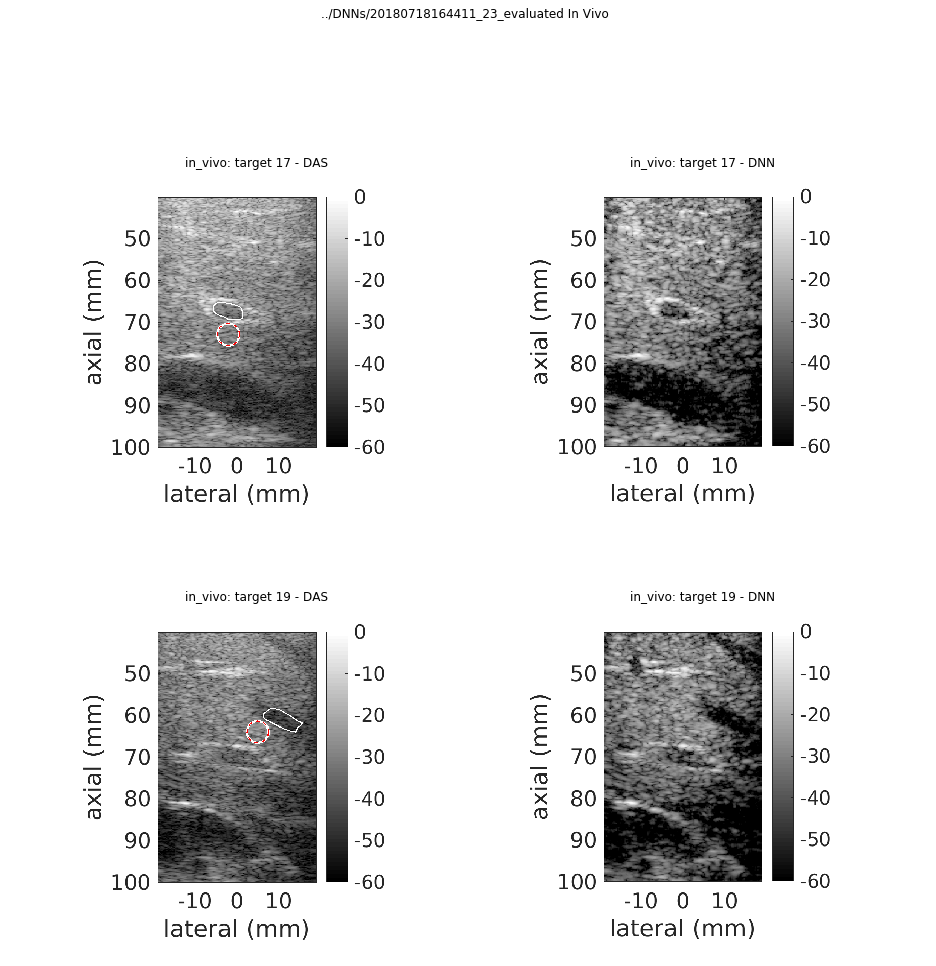

In [12]:
df_to_inspect = both
for index, model_name in enumerate(df_to_inspect['name']):
    model_folder = os.path.join('..', 'DNNs', model_name)
    print('model', index+1, 'of', len(df_to_inspect), ': ', model_name)
    inspect_by_name(model_folder)
    print()

In [13]:
both['fcs_num_hidden_layers']

130    2
238    3
91     2
254    1
71     2
8      3
Name: fcs_num_hidden_layers, dtype: object

In [14]:
# Hyperparameters to look at

hyperparams = [ \
 'name',
 'batch_norm',
 'use_pooling',
 'conv1_kernel_size',
 'conv1_num_kernels',
 'conv1_stride',
#  'conv1_dropout',
               
 'pool1_kernel_size',
 'pool1_stride',
               
 'conv2_kernel_size',
 'conv2_num_kernels',
 'conv2_stride',
 'conv2_dropout',
               
 'pool2_kernel_size',
 'pool2_stride',
               
 'fcs_hidden_size',
 'fcs_dropout',
 'fcs_num_hidden_layers',
               
               
#  'data_is_target',
 'data_noise_gaussian',
#  'data_train',
#  'data_val',
#  'k',
#  'patience',
#  'save_initial',
#  'weight_decay',
#  'batch_size',
#  'loss_val_k_3',
 'loss_val_k_4',
#  'loss_val_k_5',
          
 'learning_rate',
 'optimizer',
#  'momentum',
]



# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))


In [15]:
both[hyperparams]

name batch_norm use_pooling conv1_kernel_size  \
130  20180718164411_47_evaluated          0           1                20   
238   20180801163205_9_evaluated          0           0                20   
91   20180801163205_39_evaluated          1           0                17   
254  20180705164352_46_evaluated          1           0                 8   
71   20180718164411_36_evaluated          0           0                20   
8    20180718164411_23_evaluated          1           1                12   

    conv1_num_kernels conv1_stride pool1_kernel_size pool1_stride  \
130                16            1                 2            2   
238                28            1                 2            2   
91                 50            1                 3            2   
254                29            1                 2            2   
71                 44            1                 2            2   
8                  39            1                 2            2   

    conv2_kernel_size conv2_num_kernels    ...    conv2_dropout  \
130                10                28    ...         0.027046   
238                 2                33    ...        0.0946619   
91                 19                21    ...         0.407093   
254                 4                27    ...         0.458671   
71                 14                21    ...         0.217545   
8                   8                20    ...        0.0928158   

    pool2_kernel_size pool2_stride fcs_hidden_size fcs_dropout  \
130                 2            2             497    0.234164   
238                 2            2             277    0.347262   
91                  2            2             235    0.887018   
254                 2            2             325    0.929349   
71                  2            2             411    0.382532   
8                   2            2              48    0.537244   

    fcs_num_hidden_layers data_noise_gaussian loss_val_k_4  learning_rate  \
130                     2                   1     0.001076      0.0191322   
238                     3                   1     0.002740    5.76896e-05   
91                      2                   1     0.042703    0.000129566   
254                     1                   0     0.025343    0.000184949   
71                      2                   1     0.004829     0.00010424   
8                       3                   0     0.037304    0.000141337   

    optimizer  
130       SGD  
238      Adam  
91       Adam  
254      Adam  
71       Adam  
8        Adam  

[6 rows x 21 columns]